# Assessing the relative impact of relevant indicators on Maternal Health in Bangladesh

## Summary of Project

The aim of this project was to collect data relevant to maternal health in Bangladesh from publicly available sources, clean the data, and then visualise this data through a variety of methods.

## Step One: Data Collection

### Define Functions

Here we define the necessary functions required to webscrape from the 2015 Bangladesh Health Bulletin, which can be accessed here: https://app.dghs.gov.bd/localhealthBulletin2015/publish/graph/?level=UHS

In [1]:
#Firstly, import all necessary libraries for webscraping
from bs4 import BeautifulSoup
import re
from selenium import webdriver
from time import sleep
from random import randint
from selenium.webdriver.common.keys import Keys
import pandas as pd

In [119]:
#Now open up website 
browser = webdriver.Chrome()

#Get url
url = "https://app.dghs.gov.bd/localhealthBulletin2015/publish/graph/?level=UHS"
browser.get(url)

html_source = browser.page_source
soup = BeautifulSoup(html_source, 'html.parser')

#Get list of all potential districts
items = soup.select('option[value]')

textValues = [item.text for item in items]

districts = textValues[0:textValues.index('Thakurgaon')+1]

### Collecting data from the 2015 Health Bulletin

Several functions are required for each separate health indicator due to how the website has been built. 

In [210]:
#Function for retrieving maternal health data

def search_query_mh(x,y):
    
    #Create empty lists for regions and total of measure
    regions = []
    count = []

    #Create empty dictionary to store the lists in 
    dictionary = {}
    
    for district in districts:
             
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
        #sleep(1)

    ##Enter in Indicator Group
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)                
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
        #sleep(1)
    
    #Enter in Indicator
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[7]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[7]/div[2]/div/div/input').send_keys(y)
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[7]/div[2]/div/div/input').send_keys(Keys.RETURN)
        #sleep(1)
    
    #Submit    
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[11]/input').send_keys(Keys.RETURN)
        #sleep(3)
    
    ##Show all results
        browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[3]/div/div/div/div/div[1]/div[1]/div[2]/label/select').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[3]/div/div/div/div/div[1]/div[1]/div[2]/label/select/option[4]').click()
    
    ## Locate Table
        html_source = browser.page_source

        soup = BeautifulSoup(html_source, 'html.parser')

        table = soup.find(lambda tag: tag.name=='table' and tag.has_attr('id') and tag['id']=="dt_a")
    #print(table)
        
        results = get_table(table, 'Total')
        
        #Append Regions to list
        regions.append(results[0])
        
        #Append Total to list
        count.append(results[1])
        
    #Now need to make list of lists into one list
    regions_list = [item for sublist in regions for item in sublist]
    count_list = [item for sublist in count for item in sublist]
    
    ##Rename locations with same name
    regions_list = [v + str(regions_list[:i].count(v) + 1) if regions_list.count(v) > 1 else v for i, v in enumerate(regions_list)]
    
    #Write these lists to a dictionary
    dictionary = dict(zip(regions_list, count_list))
        
                                   
    return(dictionary)

In [4]:
##Function for returning percentage data on Maternal health

def search_query_mh2(x,y):
    
    #Create empty lists for regions and the total of measure
    regions = []
    count = []
    
    for district in districts:
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
        #sleep(1)

    ##Enter in Indicator Group
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)                
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
        #sleep(1)
    
    #Enter in Indicator
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[7]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[7]/div[2]/div/div/input').send_keys(y)
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[7]/div[2]/div/div/input').send_keys(Keys.RETURN)
        #sleep(1)
    
    #Submit    
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[11]/input').send_keys(Keys.RETURN)
        #sleep(3)
        
    #Navigate to correct page
        browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/ul/li[2]/a').click()
    
    ##Show all results
        browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[2]/div/div/div/div/div[1]/div[1]/div[2]/label/select').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[2]/div/div/div/div/div[1]/div[1]/div[2]/label/select/option[4]').click()
    
    ## Locate Table
        html_source = browser.page_source

        soup = BeautifulSoup(html_source, 'html.parser')

        table = soup.find(lambda tag: tag.name=='table' and tag.has_attr('id') and tag['id']=="dt_a")
    #print(table)
        
        results = get_table(table, 'Data Value')
        
        #Gets only locations
        locations = str(results[0])      
    
    #Tidies up string
        locations = locations.replace(' ','').replace('(','').replace(')','').replace("','",'').replace("']",'').replace(',','').replace('50','').replace('-','')
        
        #Splits string by Capital Letters
        locations = re.findall('[A-Z][^A-Z]*', locations)
    
        ##Tidy up locations so they match format of other data types
        ls_rem = ['Upazila','Upazilla','Health','Complex','Facility','Office','Chittagong','Healthcomplex','Beded','Hospital','Helth','Upzila', 'Uazila']
        locs = []
        for location in locations:
            if location not in ls_rem:
                locs.append(location)
            else:
                continue
        
        ##Now need to join up Sadar with location
        if 'Sadar' in locs:
            sadar_one = locs.index('Sadar')
            locs[sadar_one-1:sadar_one+1] = [' '.join(locs[sadar_one-1:sadar_one+1])]          
        else:
            pass
        
        ##Need to account for exceptions
        if 'Nawabganj Sadar' in locs:
            n_sadar = locs.index('Nawabganj Sadar')
            locs[n_sadar-1:n_sadar+1] = [' '.join(locs[n_sadar-1:n_sadar+1])]
        else:
            pass
        
        #Need to account for exceptions
        if 'Bazar Sadar' in locs:
            b_sadar = locs.index('Bazar Sadar')
            locs[b_sadar-1:b_sadar+1] = [' '.join(locs[b_sadar-1:b_sadar+1])]
        else:
            pass
        
        #Append locations to list to store all regions in
        regions.append(locs)
        
        #Append Total to list to store all totals in 
        count.append(results[1])
    
    #Now need to make list of lists into one list
    regions_list = [item for sublist in regions for item in sublist]
    count_list = [item for sublist in count for item in sublist]
    
    return(regions_list,count_list)

In [60]:
#Search query function for child health. Note, need to change all results
def search_query_ch(x,y):
    
    #Create empty lists for regions and total of measure
    regions = []
    count = []

    #Create empty dictionary to store the lists in 
    dictionary = {}
    
    for district in districts:
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
        #sleep(1)

    ##Enter in Indicator Group
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)                
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
        #sleep(1)
    
    #Enter in Indicator
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[6]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[6]/div[2]/div/div/input').send_keys(y)
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[6]/div[2]/div/div/input').send_keys(Keys.RETURN)
        #sleep(1)
    
    #Submit    
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[11]/input').send_keys(Keys.RETURN)
        #sleep(3)
    
    ##Show all results
        browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[3]/div/div/div/div/div[1]/div[1]/div[2]/label/select').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[3]/div/div/div/div/div[1]/div[1]/div[2]/label/select/option[4]').click()
    
    ## Locate Table
        html_source = browser.page_source

        soup = BeautifulSoup(html_source, 'html.parser')

        table = soup.find(lambda tag: tag.name=='table' and tag.has_attr('id') and tag['id']=="dt_a")
    #print(table)
        
        results = get_table(table, 'NMR')
    
        #Append Regions to list
        regions.append(results[0])
        
        #Append Total to list
        count.append(results[1])
    
    #Now need to make list of lists into one list
    regions_list = [item for sublist in regions for item in sublist]
    count_list = [item for sublist in count for item in sublist]
    
    ##Rename locations with same name
    regions_list = [v + str(regions_list[:i].count(v) + 1) if regions_list.count(v) > 1 else v for i, v in enumerate(regions_list)]
    
    #Write these lists to a dictionary
    dictionary = dict(zip(regions_list, count_list))
    
    return(dictionary)

In [6]:
#Search query function for population
def search_query_general(x,y):
    
    #Create empty lists for regions and total of measure
    regions = []
    count = []
    
    for district in districts:
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
        #sleep(1)

    ##Enter in Indicator Group
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)                
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
        #sleep(1)
    
    ##Enter in Indicator 
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[4]/div[2]/a/div/b').click() 
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[4]/div[2]/div/div/input').send_keys(y)
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[4]/div[2]/div/div/input').send_keys(Keys.RETURN)
    
    #Submit 
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[11]/input').send_keys(Keys.RETURN)
        #sleep(3)
        
    #Navigate to correct page
        browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/ul/li[2]/a').click()
    
    ##Show all results 
        browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[2]/div/div/div/div/div[1]/div[1]/div[2]/label/select').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[2]/div/div/div/div/div[1]/div[1]/div[2]/label/select/option[4]').click()
    
    ## Locate Table
        html_source = browser.page_source

        soup = BeautifulSoup(html_source, 'html.parser')

        table = soup.find(lambda tag: tag.name=='table' and tag.has_attr('id') and tag['id']=="dt_a")
    #print(table)
        
        results = get_table(table, 'Data Value')
        
        #Gets only locations
        locations = str(results[0])      
    
    #Tidies up string
        locations = locations.replace(' ','').replace('(','').replace(')','').replace("','",'').replace("']",'').replace(',','').replace('50','').replace('-','')
        
        #Splits string by Capital Letters
        locations = re.findall('[A-Z][^A-Z]*', locations)
    
        ##Tidy up locations so they match format of other data types
        ls_rem = ['Upazila','Upazilla','Health','Complex','Facility','Office','Chittagong','Healthcomplex','Beded','Hospital','Helth','Upzila', 'Uazila']
        locs = []
        for location in locations:
            if location not in ls_rem:
                locs.append(location)
            else:
                continue
        
        ##Now need to join up Sadar with location
        if 'Sadar' in locs:
            sadar_one = locs.index('Sadar')
            locs[sadar_one-1:sadar_one+1] = [' '.join(locs[sadar_one-1:sadar_one+1])]          
        else:
            pass
        
        ##Need to account for exceptions
        if 'Nawabganj Sadar' in locs:
            n_sadar = locs.index('Nawabganj Sadar')
            locs[n_sadar-1:n_sadar+1] = [' '.join(locs[n_sadar-1:n_sadar+1])]
        else:
            pass
        
        #Need to account for exceptions
        if 'Bazar Sadar' in locs:
            b_sadar = locs.index('Bazar Sadar')
            locs[b_sadar-1:b_sadar+1] = [' '.join(locs[b_sadar-1:b_sadar+1])]
        else:
            pass
        
        #Append locations to list to store all regions in
        regions.append(locs)
        
        #Append Total to list to store all totals in 
        count.append(results[1])
        
        ##Now need to remove Indicator Group before new loop
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/abbr').click()

    #Now need to make list of lists into one list
    regions_list = [item for sublist in regions for item in sublist]
    count_list = [item for sublist in count for item in sublist]
    
    return(regions_list,count_list)

In [7]:
#Search query function for number of hospitals in each district. 
def search_query_hosp(x,y):
    
   #Create empty lists for regions and total of measure
    regions = []
    count = []

    #Create empty dictionary to store the lists in 
    dictionary = {}
    
    for district in districts:
        
        
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
        #sleep(1)

    ##Enter in Indicator Group
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)                
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
        #sleep(1)
    
    #Enter in Indicator 
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[5]/div[2]/a/div/b').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[5]/div[2]/div/div/input').send_keys(y)
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[5]/div[2]/div/div/input').send_keys(Keys.RETURN)
        #sleep(1)
    
    #Submit    
        browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[11]/input').send_keys(Keys.RETURN)
        #sleep(3)
    
    ##Show all results
        browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[3]/div/div/div/div/div[1]/div[1]/div[2]/label/select').click()
        browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[3]/div/div/div/div/div[1]/div[1]/div[2]/label/select/option[4]').click()
    
    ## Locate Table
        html_source = browser.page_source

        soup = BeautifulSoup(html_source, 'html.parser')

        table = soup.find(lambda tag: tag.name=='table' and tag.has_attr('id') and tag['id']=="dt_a")
    #print(table)
        
        results = get_table(table, 'Total')
    
        #Append Regions to list
        regions.append(results[0])
        
        #Append Total to list
        count.append(results[1])
    
    #Now need to make list of lists into one list
    regions_list = [item for sublist in regions for item in sublist]
    count_list = [item for sublist in count for item in sublist]
    
    ##Rename locations with same name
    regions_list = [v + str(regions_list[:i].count(v) + 1) if regions_list.count(v) > 1 else v for i, v in enumerate(regions_list)]
    
    #Write these lists to a dictionary
    dictionary = dict(zip(regions_list, count_list))
    
    return(dictionary)

In [209]:
##Now collect data from table on website
def get_table(x,y):

    headers = []
    for i in x.find_all('th'):
        title = i.text
        headers.append(title)

    my_data = pd.DataFrame(columns = headers)
    print(my_data)
 
    #Get data from cells 
    for j in x.find_all('tr')[1:]:
        row_data = j.find_all('td')
        #print(row_data)
        row = [i.text for i in row_data]
        print(row)
        
        length = len(my_data)
        
        ##To deal with empty lists that occured at beginning
        if len(row) != 0:
            my_data.loc[length] = row
        else:
            continue
        
        #my_data = my_data.append(row)
        #print(my_data.loc[length])

    
    ##Re-name regions
    district = my_data.iloc[:,0]
    district = district.str.replace('\n','')
    district = district.str.replace('\t','')
    
    #print(my_data.loc[length])
    
    ##Add new region column
    my_data.insert(0, 'District', district)
    print(my_data)
    
    #Extract values from District and Total columns to a list
    region = my_data['District'].to_list()
    #print(region)
    
    #Need to specify the name of the column wanted extracting
    total = my_data[y].to_list()
    #print(total)
    
    #my_data.drop(my_data.columns[, axis = 1, inplace = True)
    
    
    return(region,total)

Now we are in a position to start collecting the data from the 2015 Health Bulletin. The data collected is initially stored into dictionaries

In [9]:
#Get data on number of antenatal care visits
anc_visits = search_query_mh('Maternal Health','ANC recipients-4th')

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/1128562456.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/1128562456.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/1128562456.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/1128562456.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_ele

In [151]:
pnc_recipients = search_query_mh('Maternal Health','PNC recipients')

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/1128562456.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/1128562456.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/1128562456.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/1128562456.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_ele

Upazila              \n\n\t\t\t\t\t\t\t\t\t\t\tSarankhola\n\t\t\t\t...
UHC                                                                947
Other Govt. Faci.                                                    0
NGO clin/hosp                                                        0
Pvt clin/hosp                                                        0
Not in Faci.                                                         0
Total                                                              947
Name: 8, dtype: object
['Bagerhat Sadar', 'Chitalmari', 'Fakirhat', 'Kachua', 'Mollahat', 'Mongla', 'Morelganj', 'Rampal', 'Sarankhola']
['2171', '837', '1029', '1904', '2483', '1220', '3572', '523', '947']
Upazila              \n\n\t\t\t\t\t\t\t\t\t\t\tThanchi\n\t\t\t\t\t\...
UHC                                                                 32
Other Govt. Faci.                                                    0
NGO clin/hosp                                                       78
Pvt clin/hos

Upazila              \n\n\t\t\t\t\t\t\t\t\t\t\tUkhyia\n\t\t\t\t\t\t...
UHC                                                                338
Other Govt. Faci.                                                  445
NGO clin/hosp                                                        0
Pvt clin/hosp                                                        0
Not in Faci.                                                       618
Total                                                             1401
Name: 7, dtype: object
['Chakaria', "Cox's Bazar Sadar", 'Kutubdia', 'Moheshkhali', 'Pakua', 'Ramu', 'Teknaf', 'Ukhyia']
['7216', '6249', '162', '7788', '150', '6768', '5090', '1401']
Upazila              \n\n\t\t\t\t\t\t\t\t\t\t\tSavar\n\t\t\t\t\t\t\...
UHC                                                               8773
Other Govt. Faci.                                                    0
NGO clin/hosp                                                        0
Pvt clin/hosp                      

Upazila              \n\n\t\t\t\t\t\t\t\t\t\t\tPanchbibi\n\t\t\t\t\...
UHC                                                                230
Other Govt. Faci.                                                    0
NGO clin/hosp                                                        0
Pvt clin/hosp                                                        0
Not in Faci.                                                      3977
Total                                                             4207
Name: 4, dtype: object
['Akkelpur', 'Joypurhat Sadar', 'Kalai', 'Khetlal', 'Panchbibi']
['3274', '1980', '944', '1361', '4207']
Upazila              \n\n\t\t\t\t\t\t\t\t\t\t\tRamgarh\n\t\t\t\t\t\...
UHC                                                                103
Other Govt. Faci.                                                  231
NGO clin/hosp                                                      268
Pvt clin/hosp                                                        0
Not in Faci.        

Upazila              \n\n\t\t\t\t\t\t\t\t\t\t\tTungibari\n\t\t\t\t\...
UHC                                                               2158
Other Govt. Faci.                                                  424
NGO clin/hosp                                                        0
Pvt clin/hosp                                                     1577
Not in Faci.                                                       986
Total                                                             5145
Name: 5, dtype: object
['Gazaria', 'Louhajang', 'Munshiganj Sadar', 'Serajdikhan', 'Sreenagar', 'Tungibari']
['3235', '2895', '5234', '2297', '4820', '5145']
Upazila              \n\n\t\t\t\t\t\t\t\t\t\t\tTrisal\n\t\t\t\t\t\t...
UHC                                                                950
Other Govt. Faci.                                                 1367
NGO clin/hosp                                                        0
Pvt clin/hosp                                                

Upazila              \n\n\t\t\t\t\t\t\t\t\t\t\tZia Nagar\n\t\t\t\t\...
UHC                                                                  0
Other Govt. Faci.                                                    0
NGO clin/hosp                                                        0
Pvt clin/hosp                                                        0
Not in Faci.                                                      1380
Total                                                             1380
Name: 6, dtype: object
['Bhandaria', 'Kaukhali', 'Mathbaria', 'Nazirpur', 'Nesarabad', 'Perojpur Sadar', 'Zia Nagar']
['3441', '1505', '1771', '3013', '2760', '1963', '1380']
Upazila              \n\n\t\t\t\t\t\t\t\t\t\t\tRajbari Sadar\n\t\t\...
UHC                                                                  0
Other Govt. Faci.                                                  710
NGO clin/hosp                                                       64
Pvt clin/hosp                               

Upazila              \n\n\t\t\t\t\t\t\t\t\t\t\tThakurgaon Sadar\n\t...
UHC                                                               7245
Other Govt. Faci.                                                    0
NGO clin/hosp                                                        0
Pvt clin/hosp                                                        0
Not in Faci.                                                         0
Total                                                             7245
Name: 4, dtype: object
['Baliadangi', 'Haripur', 'Pirganj', 'Ranisankhail', 'Thakurgaon Sadar']
['1384', '3233', '2778', '4117', '7245']


In [10]:
complications_treated = search_query_mh('Maternal Health','Pregnancy complications treated')

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/1128562456.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/1128562456.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/1128562456.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/1128562456.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_ele

In [13]:
#Note need to change get_table variable to call 'MMR'
mmr = search_query_mh('Maternal Health','Maternal death-MMR')

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2186747015.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2186747015.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2186747015.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2186747015.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_ele

In [16]:
#Get data on Number of C-sections
csec_no = search_query_mh('Maternal Health', 'Delivery-Cesarean Section')

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/1128562456.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/1128562456.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/1128562456.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/1128562456.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_ele

In [211]:
preg_no = search_query_mh('Maternal Health', 'Pregnancy registration')

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_ele

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBagerhat Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '4328', '4328']
['\n\n\t\t\t\t\t\t\t\t\t\tChitalmari\n\t\t\t\t\t\t\t\t\t\t\n', '201', '0', '0', '0', '3166', '3367']
['\n\n\t\t\t\t\t\t\t\t\t\tFakirhat\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '2545', '2545']
['\n\n\t\t\t\t\t\t\t\t\t\tKachua\n\t\t\t\t\t\t\t\t\t\t\n', '118', '0', '0', '0', '1865', '1983']
['\n\n\t\t\t\t\t\t\t\t\t\tMollahat\n\t\t\t\t\t\t\t\t\t\t\n', '129', '690', '95', '0', '1927', '2841']
['\n\n\t\t\t\t\t\t\t\t\t\tMongla\n\t\t\t\t\t\t\t\t\t\t\n', '455', '825', '610', '115', '287', '2292']
['\n\n\t\t\t\t\t\t\t\t\t\tMorelganj\n\t\t\t\t\t\t\t\t\t\t\n', '320', '0', '0', '0', '5093', '5413']
['\n\n\t\t\t\t\t\t\t\t\t\tRampal\n\t\t\t\t\t\t\t\t\t\t\n', '379', '2225', '0', '0', '0', '2604']
['\n\n\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tAlikadam\n\t\t\t\t\t\t\t\t\t\t\n', '151', '752', '28', '0', '372', '1303']
['\n\n\t\t\t\t\t\t\t\t\t\tBandarban Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '2110', '0', '0', '0', '0', '2110']
['\n\n\t\t\t\t\t\t\t\t\t\tLama\n\t\t\t\t\t\t\t\t\t\t\n', '910', '3094', '0', '0', '0', '4004']
['\n\n\t\t\t\t\t\t\t\t\t\tNykongchari\n\t\t\t\t\t\t\t\t\t\t\n', '2450', '0', '0', '0', '0', '2450']
['\n\n\t\t\t\t\t\t\t\t\t\tRawangchari\n\t\t\t\t\t\t\t\t\t\t\n', '364', '0', '31', '0', '231', '626']
['\n\n\t\t\t\t\t\t\t\t\t\tRuma\n\t\t\t\t\t\t\t\t\t\t\n', '1136', '0', '350', '0', '0', '1486']
['\n\n\t\t\t\t\t\t\t\t\t\tThanchi\n\t\t\t\t\t\t\t\t\t\t\n', '78', '0', '112', '0', '664', '854']
          District                                    Name of Upazila  \
0         Alikadam  \n\n\t\t\t\t\t\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tAmtali\n\t\t\t\t\t\t\t\t\t\t\n', '348', '2313', '0', '296', '4840', '7797']
['\n\n\t\t\t\t\t\t\t\t\t\tBamna\n\t\t\t\t\t\t\t\t\t\t\n', '245', '754', '0', '0', '2248', '3247']
['\n\n\t\t\t\t\t\t\t\t\t\tBarguna Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '5139', '5139']
['\n\n\t\t\t\t\t\t\t\t\t\tBetagi\n\t\t\t\t\t\t\t\t\t\t\n', '284', '193', '0', '0', '3447', '3924']
['\n\n\t\t\t\t\t\t\t\t\t\tPathargatha\n\t\t\t\t\t\t\t\t\t\t\n', '332', '724', '752', '0', '2627', '4435']
        District                                    Name of Upazila  \
0         Amtali  \n\n\t\t\t\t\t\t\t\t\t\tAmtali\n\t\t\t\t\t\t\t...   
1          Bamna  \n\n\t\t\t\t\t\t\t\t\t\tBamna\n\t\t\t\t\t\t\t\...   
2  Barguna Sadar  \n\n\t\t\t\t\t\t\t\t\t\tBarguna Sadar\n\t\t\t\...   
3         Betag

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tAgailjhara\n\t\t\t\t\t\t\t\t\t\t\n', '346', '0', '0', '0', '2969', '3315']
['\n\n\t\t\t\t\t\t\t\t\t\tBabuganj\n\t\t\t\t\t\t\t\t\t\t\n', '93', '147', '0', '0', '3502', '3742']
['\n\n\t\t\t\t\t\t\t\t\t\tBakerganj\n\t\t\t\t\t\t\t\t\t\t\n', '362', '4709', '44', '0', '4548', '9663']
['\n\n\t\t\t\t\t\t\t\t\t\tBanaripara\n\t\t\t\t\t\t\t\t\t\t\n', '0', '406', '0', '0', '4550', '4956']
['\n\n\t\t\t\t\t\t\t\t\t\tBarisal Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '5103', '5103']
['\n\n\t\t\t\t\t\t\t\t\t\tGournadi\n\t\t\t\t\t\t\t\t\t\t\n', '205', '1155', '425', '210', '2280', '4275']
['\n\n\t\t\t\t\t\t\t\t\t\tHijla\n\t\t\t\t\t\t\t\t\t\t\n', '307', '0', '0', '0', '4277', '4584']
['\n\n\t\t\t\t\t\t\t\t\t\tMehendiganj\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '9115', '911

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBhola Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '11830', '11830']
['\n\n\t\t\t\t\t\t\t\t\t\tBorhanuddin\n\t\t\t\t\t\t\t\t\t\t\n', '401', '6276', '0', '0', '0', '6677']
['\n\n\t\t\t\t\t\t\t\t\t\tCharfession\n\t\t\t\t\t\t\t\t\t\t\n', '1198', '0', '633', '560', '14973', '17364']
['\n\n\t\t\t\t\t\t\t\t\t\tDaulatkhan\n\t\t\t\t\t\t\t\t\t\t\n', '161', '236', '0', '0', '4065', '4462']
['\n\n\t\t\t\t\t\t\t\t\t\tLalmohan\n\t\t\t\t\t\t\t\t\t\t\n', '278', '0', '0', '0', '8964', '9242']
['\n\n\t\t\t\t\t\t\t\t\t\tManpura\n\t\t\t\t\t\t\t\t\t\t\n', '498', '0', '0', '0', '2559', '3057']
['\n\n\t\t\t\t\t\t\t\t\t\tTajumuddin\n\t\t\t\t\t\t\t\t\t\t\n', '676', '0', '0', '0', '4582', '5258']
      District                                    Name of Upazila  \
0  Bhola Sadar  \n\n\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tAdamdighi\n\t\t\t\t\t\t\t\t\t\t\n', '4096', '0', '0', '0', '0', '4096']
['\n\n\t\t\t\t\t\t\t\t\t\tBogra Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '6242', '652', '0', '1022', '7916']
['\n\n\t\t\t\t\t\t\t\t\t\tDhunat\n\t\t\t\t\t\t\t\t\t\t\n', '1964', '212', '344', '0', '4648', '7168']
['\n\n\t\t\t\t\t\t\t\t\t\tDhupchachia\n\t\t\t\t\t\t\t\t\t\t\n', '245', '3883', '0', '0', '0', '4128']
['\n\n\t\t\t\t\t\t\t\t\t\tGabtali\n\t\t\t\t\t\t\t\t\t\t\n', '1443', '1744', '0', '0', '2817', '6004']
['\n\n\t\t\t\t\t\t\t\t\t\tKahaloo\n\t\t\t\t\t\t\t\t\t\t\n', '150', '0', '210', '0', '5252', '5612']
['\n\n\t\t\t\t\t\t\t\t\t\tNandigram\n\t\t\t\t\t\t\t\t\t\t\n', '39', '0', '0', '0', '4627', '4666']
['\n\n\t\t\t\t\t\t\t\t\t\tSariakandi\n\t\t\t\t\t\t\t\t\t\t\n', '3665', '2423', '1236', '0', '0', '

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tAkhaura\n\t\t\t\t\t\t\t\t\t\t\n', '79', '927', '0', '0', '4106', '5112']
['\n\n\t\t\t\t\t\t\t\t\t\tAshugonj\n\t\t\t\t\t\t\t\t\t\t\n', '474', '0', '0', '0', '5128', '5602']
['\n\n\t\t\t\t\t\t\t\t\t\tBancharampur\n\t\t\t\t\t\t\t\t\t\t\n', '128', '207', '0', '120', '8848', '9303']
['\n\n\t\t\t\t\t\t\t\t\t\tBrahmanbaria Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '18575', '18575']
['\n\n\t\t\t\t\t\t\t\t\t\tKashba\n\t\t\t\t\t\t\t\t\t\t\n', '91', '0', '0', '426', '9043', '9560']
['\n\n\t\t\t\t\t\t\t\t\t\tNabinagar\n\t\t\t\t\t\t\t\t\t\t\n', '818', '5239', '2753', '5281', '3526', '17617']
['\n\n\t\t\t\t\t\t\t\t\t\tNasirnagar\n\t\t\t\t\t\t\t\t\t\t\n', '96', '0', '0', '47', '9950', '10093']
['\n\n\t\t\t\t\t\t\t\t\t\tSarail\n\t\t\t\t\t\t\t\t\t\t\n', '194', '0', '0', '317',

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tChandpur Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '9498', '9498']
['\n\n\t\t\t\t\t\t\t\t\t\tFaridganj\n\t\t\t\t\t\t\t\t\t\t\n', '879', '10893', '0', '789', '0', '12561']
['\n\n\t\t\t\t\t\t\t\t\t\tHaimchar\n\t\t\t\t\t\t\t\t\t\t\n', '625', '0', '0', '0', '3208', '3833']
['\n\n\t\t\t\t\t\t\t\t\t\tHajiganj\n\t\t\t\t\t\t\t\t\t\t\n', '140', '0', '0', '1403', '8418', '9961']
['\n\n\t\t\t\t\t\t\t\t\t\tKachua\n\t\t\t\t\t\t\t\t\t\t\n', '250', '0', '0', '0', '19069', '19319']
['\n\n\t\t\t\t\t\t\t\t\t\tMatlab(Daxin)\n\t\t\t\t\t\t\t\t\t\t\n', '515', '1280', '2971', '0', '974', '5740']
['\n\n\t\t\t\t\t\t\t\t\t\tMatlab(Uttar)\n\t\t\t\t\t\t\t\t\t\t\n', '892', '3576', '55', '585', '2577', '7685']
['\n\n\t\t\t\t\t\t\t\t\t\tSaharasthi\n\t\t\t\t\t\t\t\t\t\t\n', '98', '0', '0', '

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBholahat\n\t\t\t\t\t\t\t\t\t\t\n', '2198', '0', '0', '0', '0', '2198']
['\n\n\t\t\t\t\t\t\t\t\t\tChapai Nawabganj Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '12834', '0', '0', '0', '0', '12834']
['\n\n\t\t\t\t\t\t\t\t\t\tGomastapur\n\t\t\t\t\t\t\t\t\t\t\n', '6112', '0', '0', '0', '0', '6112']
['\n\n\t\t\t\t\t\t\t\t\t\tNachol\n\t\t\t\t\t\t\t\t\t\t\n', '458', '0', '0', '800', '2262', '3520']
['\n\n\t\t\t\t\t\t\t\t\t\tShibganj\n\t\t\t\t\t\t\t\t\t\t\n', '11208', '0', '0', '0', '0', '11208']
                 District                                    Name of Upazila  \
0                Bholahat  \n\n\t\t\t\t\t\t\t\t\t\tBholahat\n\t\t\t\t\t\t...   
1  Chapai Nawabganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\tChapai Nawabganj Sadar...   
2              Gomastapur  \n\n\t\t\t\t\t\t\t\t\t\tGomastap

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tAnwara\n\t\t\t\t\t\t\t\t\t\t\n', '506', '0', '997', '0', '7350', '8853']
['\n\n\t\t\t\t\t\t\t\t\t\tBanshkhali\n\t\t\t\t\t\t\t\t\t\t\n', '1448', '0', '0', '0', '0', '1448']
['\n\n\t\t\t\t\t\t\t\t\t\tBoalkhali\n\t\t\t\t\t\t\t\t\t\t\n', '2156', '2098', '0', '0', '0', '4254']
['\n\n\t\t\t\t\t\t\t\t\t\tChandanaish\n\t\t\t\t\t\t\t\t\t\t\n', '4896', '0', '1895', '0', '0', '6791']
['\n\n\t\t\t\t\t\t\t\t\t\tFatikchari\n\t\t\t\t\t\t\t\t\t\t\n', '26149', '0', '0', '10943', '0', '37092']
['\n\n\t\t\t\t\t\t\t\t\t\tHathazari\n\t\t\t\t\t\t\t\t\t\t\n', '3016', '2362', '0', '6674', '0', '12052']
['\n\n\t\t\t\t\t\t\t\t\t\tLohagara\n\t\t\t\t\t\t\t\t\t\t\n', '1128', '0', '3459', '4034', '0', '8621']
['\n\n\t\t\t\t\t\t\t\t\t\tMirarsarai\n\t\t\t\t\t\t\t\t\t\t\n', '1809', '0', '500', '1265', 

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tAlamdanga\n\t\t\t\t\t\t\t\t\t\t\n', '1238', '0', '0', '915', '4154', '6307']
['\n\n\t\t\t\t\t\t\t\t\t\tChuadanga Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '1028', '219', '2085', '2928', '6260']
['\n\n\t\t\t\t\t\t\t\t\t\tDamurhuda\n\t\t\t\t\t\t\t\t\t\t\n', '1320', '0', '0', '968', '3642', '5930']
['\n\n\t\t\t\t\t\t\t\t\t\tJibannagar\n\t\t\t\t\t\t\t\t\t\t\n', '596', '0', '0', '517', '3474', '4587']
          District                                    Name of Upazila  \
0        Alamdanga  \n\n\t\t\t\t\t\t\t\t\t\tAlamdanga\n\t\t\t\t\t\...   
1  Chuadanga Sadar  \n\n\t\t\t\t\t\t\t\t\t\tChuadanga Sadar\n\t\t\...   
2        Damurhuda  \n\n\t\t\t\t\t\t\t\t\t\tDamurhuda\n\t\t\t\t\t\...   
3       Jibannagar  \n\n\t\t\t\t\t\t\t\t\t\tJibannagar\n\t\t\t\t\t...   

  Upazila Health co

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_ele

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBarura\n\t\t\t\t\t\t\t\t\t\t\n', '241', '0', '156', '9682', '12560', '22639']
['\n\n\t\t\t\t\t\t\t\t\t\tBrahmmanpara\n\t\t\t\t\t\t\t\t\t\t\n', '6910', '0', '0', '0', '0', '6910']
['\n\n\t\t\t\t\t\t\t\t\t\tBurichong\n\t\t\t\t\t\t\t\t\t\t\n', '157', '2470', '405', '415', '5565', '9012']
['\n\n\t\t\t\t\t\t\t\t\t\tChaddagram\n\t\t\t\t\t\t\t\t\t\t\n', '12952', '0', '0', '0', '0', '12952']
['\n\n\t\t\t\t\t\t\t\t\t\tChandina\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '13223', '13223']
['\n\n\t\t\t\t\t\t\t\t\t\tComilla Sadar Daxin\n\t\t\t\t\t\t\t\t\t\t\n', '0', '6490', '0', '0', '4820', '11310']
['\n\n\t\t\t\t\t\t\t\t\t\tComilla Sadar Upazila\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '7855', '7855']
['\n\n\t\t\t\t\t\t\t\t\t\tDaudkandi\n\t\t\t\t\t\t\t\t\t\t\n', '1862', '6

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_ele

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tChakaria\n\t\t\t\t\t\t\t\t\t\t\n', '963', '0', '2321', '3832', '6243', '13359']
["\n\n\t\t\t\t\t\t\t\t\t\tCox's Bazar Sadar\n\t\t\t\t\t\t\t\t\t\t\n", '0', '0', '0', '0', '8701', '8701']
['\n\n\t\t\t\t\t\t\t\t\t\tKutubdia\n\t\t\t\t\t\t\t\t\t\t\n', '30', '0', '0', '0', '4653', '4683']
['\n\n\t\t\t\t\t\t\t\t\t\tMoheshkhali\n\t\t\t\t\t\t\t\t\t\t\n', '2534', '7082', '0', '0', '0', '9616']
['\n\n\t\t\t\t\t\t\t\t\t\tPakua\n\t\t\t\t\t\t\t\t\t\t\n', '27', '0', '0', '0', '4653', '4680']
['\n\n\t\t\t\t\t\t\t\t\t\tRamu\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '8422', '8422']
['\n\n\t\t\t\t\t\t\t\t\t\tTeknaf\n\t\t\t\t\t\t\t\t\t\t\n', '3610', '2813', '11491', '0', '8260', '26174']
['\n\n\t\t\t\t\t\t\t\t\t\tUkhyia\n\t\t\t\t\t\t\t\t\t\t\n', '0', '1605', '0', '0', '4378', '5983']
 

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tDhaka Metropolitan\n\t\t\t\t\t\t\t\t\t\t\n', '36140', '0', '0', '0', '0', '36140']
['\n\n\t\t\t\t\t\t\t\t\t\tDhamrai\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '12158', '12158']
['\n\n\t\t\t\t\t\t\t\t\t\tDohar\n\t\t\t\t\t\t\t\t\t\t\n', '4574', '1910', '1201', '5475', '6013', '19173']
['\n\n\t\t\t\t\t\t\t\t\t\tKeraniganj\n\t\t\t\t\t\t\t\t\t\t\n', '816', '3921', '839', '4861', '17864', '28301']
['\n\n\t\t\t\t\t\t\t\t\t\tNawabganj\n\t\t\t\t\t\t\t\t\t\t\n', '7798', '0', '0', '0', '0', '7798']
['\n\n\t\t\t\t\t\t\t\t\t\tSavar\n\t\t\t\t\t\t\t\t\t\t\n', '6033', '0', '0', '0', '34937', '40970']
             District                                    Name of Upazila  \
0  Dhaka Metropolitan  \n\n\t\t\t\t\t\t\t\t\t\tDhaka Metropolitan\n\t...   
1             Dhamrai  \n\n\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBirampur\n\t\t\t\t\t\t\t\t\t\t\n', '3195', '0', '0', '0', '0', '3195']
['\n\n\t\t\t\t\t\t\t\t\t\tBirganj\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '4933', '4933']
['\n\n\t\t\t\t\t\t\t\t\t\tBirol\n\t\t\t\t\t\t\t\t\t\t\n', '603', '0', '1390', '0', '4813', '6806']
['\n\n\t\t\t\t\t\t\t\t\t\tBochaganj\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '6652', '6652']
['\n\n\t\t\t\t\t\t\t\t\t\tChirirbandar\n\t\t\t\t\t\t\t\t\t\t\n', '6784', '0', '0', '0', '0', '6784']
['\n\n\t\t\t\t\t\t\t\t\t\tDinajpur Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '5546', '0', '0', '0', '5546']
['\n\n\t\t\t\t\t\t\t\t\t\tFulbari\n\t\t\t\t\t\t\t\t\t\t\n', '417', '0', '0', '364', '1596', '2377']
['\n\n\t\t\t\t\t\t\t\t\t\tGhoraghat\n\t\t\t\t\t\t\t\t\t\t\n', '222', '1903', '0', '0', '1033', '3158']
['\n\n\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tAlfadanga\n\t\t\t\t\t\t\t\t\t\t\n', '1526', '0', '0', '0', '0', '1526']
['\n\n\t\t\t\t\t\t\t\t\t\tBhanga\n\t\t\t\t\t\t\t\t\t\t\n', '1051', '0', '0', '0', '5534', '6585']
['\n\n\t\t\t\t\t\t\t\t\t\tBoalmari\n\t\t\t\t\t\t\t\t\t\t\n', '4475', '47758', '3012', '30590', '22295', '108130']
['\n\n\t\t\t\t\t\t\t\t\t\tCharbhadrason\n\t\t\t\t\t\t\t\t\t\t\n', '1846', '0', '0', '0', '0', '1846']
['\n\n\t\t\t\t\t\t\t\t\t\tFaridpur Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '4465', '0', '0', '0', '0', '4465']
['\n\n\t\t\t\t\t\t\t\t\t\tMadhukhali\n\t\t\t\t\t\t\t\t\t\t\n', '7987', '0', '0', '0', '0', '7987']
['\n\n\t\t\t\t\t\t\t\t\t\tNagarkanda\n\t\t\t\t\t\t\t\t\t\t\n', '243', '0', '0', '0', '9744', '9987']
['\n\n\t\t\t\t\t\t\t\t\t\tSadarpur\n\t\t\t\t\t\t\t\t\t\t\n', '1650', '0', '0', '1195', '395

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tChhagalnaya\n\t\t\t\t\t\t\t\t\t\t\n', '445', '0', '0', '0', '7106', '7551']
['\n\n\t\t\t\t\t\t\t\t\t\tDaganbhuiya\n\t\t\t\t\t\t\t\t\t\t\n', '2719', '0', '0', '0', '5062', '7781']
['\n\n\t\t\t\t\t\t\t\t\t\tFeni Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '9536', '9536']
['\n\n\t\t\t\t\t\t\t\t\t\tFulgazi\n\t\t\t\t\t\t\t\t\t\t\n', '295', '0', '0', '0', '3403', '3698']
['\n\n\t\t\t\t\t\t\t\t\t\tParsuram\n\t\t\t\t\t\t\t\t\t\t\n', '972', '696', '732', '0', '312', '2712']
['\n\n\t\t\t\t\t\t\t\t\t\tSonagazi\n\t\t\t\t\t\t\t\t\t\t\n', '1317', '1933', '0', '0', '3799', '7049']
      District                                    Name of Upazila  \
0  Chhagalnaya  \n\n\t\t\t\t\t\t\t\t\t\tChhagalnaya\n\t\t\t\t\...   
1  Daganbhuiya  \n\n\t\t\t\t\t\t\t\t\t\tDaganbhuiya\n\t\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tFulchari\n\t\t\t\t\t\t\t\t\t\t\n', '536', '2087', '3319', '0', '0', '5942']
['\n\n\t\t\t\t\t\t\t\t\t\tGaibandha Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '9229', '0', '0', '9229']
['\n\n\t\t\t\t\t\t\t\t\t\tGobindaganj\n\t\t\t\t\t\t\t\t\t\t\n', '11100', '0', '0', '0', '0', '11100']
['\n\n\t\t\t\t\t\t\t\t\t\tPalashbari\n\t\t\t\t\t\t\t\t\t\t\n', '871', '140', '5396', '0', '837', '7244']
['\n\n\t\t\t\t\t\t\t\t\t\tSadullapur\n\t\t\t\t\t\t\t\t\t\t\n', '2121', '0', '0', '0', '4722', '6843']
['\n\n\t\t\t\t\t\t\t\t\t\tShaghatta\n\t\t\t\t\t\t\t\t\t\t\n', '416', '0', '8230', '0', '0', '8646']
['\n\n\t\t\t\t\t\t\t\t\t\tSundarganj\n\t\t\t\t\t\t\t\t\t\t\n', '900', '0', '0', '0', '11176', '12076']
          District                                    Name of Upazila  \
0         Fulch

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tGazipur Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '32449', '32449']
['\n\n\t\t\t\t\t\t\t\t\t\tKaliakair\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '14119', '14119']
['\n\n\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '6634', '6634']
['\n\n\t\t\t\t\t\t\t\t\t\tKapasia\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '10998', '10998']
['\n\n\t\t\t\t\t\t\t\t\t\tSreepur\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '17607', '17607']
        District                                    Name of Upazila  \
0  Gazipur Sadar  \n\n\t\t\t\t\t\t\t\t\t\tGazipur Sadar\n\t\t\t\...   
1      Kaliakair  \n\n\t\t\t\t\t\t\t\t\t\tKaliakair\n\t\t\t\t\t\...   
2       Kaliganj  \n\n\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t\t...   
3        Kapasia  \n\n\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tGopalganj Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '6164', '6164']
['\n\n\t\t\t\t\t\t\t\t\t\tKassiani\n\t\t\t\t\t\t\t\t\t\t\n', '550', '839', '0', '0', '3274', '4663']
['\n\n\t\t\t\t\t\t\t\t\t\tKotwalipara\n\t\t\t\t\t\t\t\t\t\t\n', '2527', '892', '0', '392', '1779', '5590']
['\n\n\t\t\t\t\t\t\t\t\t\tMukshedpur\n\t\t\t\t\t\t\t\t\t\t\n', '358', '0', '0', '0', '7295', '7653']
['\n\n\t\t\t\t\t\t\t\t\t\tTungipara\n\t\t\t\t\t\t\t\t\t\t\n', '890', '1012', '0', '0', '1198', '3100']
          District                                    Name of Upazila  \
0  Gopalganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\tGopalganj Sadar\n\t\t\...   
1         Kassiani  \n\n\t\t\t\t\t\t\t\t\t\tKassiani\n\t\t\t\t\t\t...   
2      Kotwalipara  \n\n\t\t\t\t\t\t\t\t\t\tKotwalipara\n\t\t\t\t\...  

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tAzmiriganj\n\t\t\t\t\t\t\t\t\t\t\n', '668', '1153', '0', '0', '1359', '3180']
['\n\n\t\t\t\t\t\t\t\t\t\tBahubal\n\t\t\t\t\t\t\t\t\t\t\n', '82', '848', '0', '0', '4649', '5579']
['\n\n\t\t\t\t\t\t\t\t\t\tBaniachong\n\t\t\t\t\t\t\t\t\t\t\n', '378', '2831', '0', '0', '5781', '8990']
['\n\n\t\t\t\t\t\t\t\t\t\tChunarughat\n\t\t\t\t\t\t\t\t\t\t\n', '232', '380', '0', '0', '7571', '8183']
['\n\n\t\t\t\t\t\t\t\t\t\tHobiganj Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '2850', '455', '0', '3256', '6561']
['\n\n\t\t\t\t\t\t\t\t\t\tLakhai\n\t\t\t\t\t\t\t\t\t\t\n', '151', '441', '0', '0', '3813', '4405']
['\n\n\t\t\t\t\t\t\t\t\t\tMadhabpur\n\t\t\t\t\t\t\t\t\t\t\n', '318', '637', '0', '2190', '6069', '9214']
['\n\n\t\t\t\t\t\t\t\t\t\tNabiganj\n\t\t\t\t\t\t\t\t\t\t\n', '1315', '1415', '491',

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBakshiganj\n\t\t\t\t\t\t\t\t\t\t\n', '1116', '1610', '1125', '0', '4425', '8276']
['\n\n\t\t\t\t\t\t\t\t\t\tDewanganj\n\t\t\t\t\t\t\t\t\t\t\n', '520', '1012', '1820', '2210', '3310', '8872']
['\n\n\t\t\t\t\t\t\t\t\t\tIslampur\n\t\t\t\t\t\t\t\t\t\t\n', '449', '620', '3581', '0', '5506', '10156']
['\n\n\t\t\t\t\t\t\t\t\t\tJamalpur Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '3620', '1432', '0', '6190', '11242']
['\n\n\t\t\t\t\t\t\t\t\t\tMadarganj\n\t\t\t\t\t\t\t\t\t\t\n', '1742', '3400', '0', '0', '2465', '7607']
['\n\n\t\t\t\t\t\t\t\t\t\tMelandaha\n\t\t\t\t\t\t\t\t\t\t\n', '2127', '1755', '1500', '0', '3578', '8960']
['\n\n\t\t\t\t\t\t\t\t\t\tSarisabari\n\t\t\t\t\t\t\t\t\t\t\n', '2428', '752', '0', '0', '4362', '7542']
         District                                    Name o

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tAbhoynagar\n\t\t\t\t\t\t\t\t\t\t\n', '3769', '864', '543', '588', '659', '6423']
['\n\n\t\t\t\t\t\t\t\t\t\tBagerpara\n\t\t\t\t\t\t\t\t\t\t\n', '625', '2563', '0', '0', '941', '4129']
['\n\n\t\t\t\t\t\t\t\t\t\tChowgacha\n\t\t\t\t\t\t\t\t\t\t\n', '5121', '0', '0', '0', '0', '5121']
['\n\n\t\t\t\t\t\t\t\t\t\tJessore Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '10878', '10878']
['\n\n\t\t\t\t\t\t\t\t\t\tJhikargacha\n\t\t\t\t\t\t\t\t\t\t\n', '1578', '1258', '0', '0', '2778', '5614']
['\n\n\t\t\t\t\t\t\t\t\t\tKeshabpur\n\t\t\t\t\t\t\t\t\t\t\n', '4427', '0', '0', '0', '0', '4427']
['\n\n\t\t\t\t\t\t\t\t\t\tMonirampur\n\t\t\t\t\t\t\t\t\t\t\n', '404', '0', '0', '200', '5992', '6596']
['\n\n\t\t\t\t\t\t\t\t\t\tSarsa\n\t\t\t\t\t\t\t\t\t\t\n', '933', '0', '0', '0', '5897', 

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tJhalokathi Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '3010', '0', '0', '0', '0', '3010']
['\n\n\t\t\t\t\t\t\t\t\t\tKathalia\n\t\t\t\t\t\t\t\t\t\t\n', '423', '490', '0', '0', '2226', '3139']
['\n\n\t\t\t\t\t\t\t\t\t\tNalchithi\n\t\t\t\t\t\t\t\t\t\t\n', '270', '2388', '175', '185', '320', '3338']
['\n\n\t\t\t\t\t\t\t\t\t\tRajapur\n\t\t\t\t\t\t\t\t\t\t\n', '764', '675', '402', '0', '3006', '4847']
           District                                    Name of Upazila  \
0  Jhalokathi Sadar  \n\n\t\t\t\t\t\t\t\t\t\tJhalokathi Sadar\n\t\t...   
1          Kathalia  \n\n\t\t\t\t\t\t\t\t\t\tKathalia\n\t\t\t\t\t\t...   
2         Nalchithi  \n\n\t\t\t\t\t\t\t\t\t\tNalchithi\n\t\t\t\t\t\...   
3           Rajapur  \n\n\t\t\t\t\t\t\t\t\t\tRajapur\n\t\t\t\t\t\t\...   

  Upazila Health comp

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tHarinakunda\n\t\t\t\t\t\t\t\t\t\t\n', '1530', '0', '0', '0', '2032', '3562']
['\n\n\t\t\t\t\t\t\t\t\t\tJhenaidah Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '5897', '5897']
['\n\n\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t\t\t\t\t\t\n', '308', '0', '0', '0', '5153', '5461']
['\n\n\t\t\t\t\t\t\t\t\t\tKotchandpur\n\t\t\t\t\t\t\t\t\t\t\n', '265', '0', '0', '0', '2781', '3046']
['\n\n\t\t\t\t\t\t\t\t\t\tMoheshpur\n\t\t\t\t\t\t\t\t\t\t\n', '516', '0', '0', '0', '5486', '6002']
['\n\n\t\t\t\t\t\t\t\t\t\tSailkupa\n\t\t\t\t\t\t\t\t\t\t\n', '420', '0', '0', '0', '6874', '7294']
          District                                    Name of Upazila  \
0      Harinakunda  \n\n\t\t\t\t\t\t\t\t\t\tHarinakunda\n\t\t\t\t\...   
1  Jhenaidah Sadar  \n\n\t\t\t\t\t\t\t\t\t\tJhenaidah

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tAkkelpur\n\t\t\t\t\t\t\t\t\t\t\n', '626', '0', '0', '0', '4379', '5005']
['\n\n\t\t\t\t\t\t\t\t\t\tJoypurhat Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '150', '0', '0', '4571', '4721']
['\n\n\t\t\t\t\t\t\t\t\t\tKalai\n\t\t\t\t\t\t\t\t\t\t\n', '3213', '0', '0', '0', '0', '3213']
['\n\n\t\t\t\t\t\t\t\t\t\tKhetlal\n\t\t\t\t\t\t\t\t\t\t\n', '1634', '0', '0', '0', '0', '1634']
['\n\n\t\t\t\t\t\t\t\t\t\tPanchbibi\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '4614', '4614']
          District                                    Name of Upazila  \
0         Akkelpur  \n\n\t\t\t\t\t\t\t\t\t\tAkkelpur\n\t\t\t\t\t\t...   
1  Joypurhat Sadar  \n\n\t\t\t\t\t\t\t\t\t\tJoypurhat Sadar\n\t\t\...   
2            Kalai  \n\n\t\t\t\t\t\t\t\t\t\tKalai\n\t\t\t\t\t\t\t\...   
3          Khetlal  \

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tDighinala\n\t\t\t\t\t\t\t\t\t\t\n', '512', '0', '312', '0', '872', '1696']
['\n\n\t\t\t\t\t\t\t\t\t\tKhagrachari Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '3259', '0', '0', '0', '0', '3259']
['\n\n\t\t\t\t\t\t\t\t\t\tLakshmichari\n\t\t\t\t\t\t\t\t\t\t\n', '0', '594', '0', '0', '1050', '1644']
['\n\n\t\t\t\t\t\t\t\t\t\tManikchari\n\t\t\t\t\t\t\t\t\t\t\n', '101', '261', '1162', '0', '826', '2350']
['\n\n\t\t\t\t\t\t\t\t\t\tMatiranga\n\t\t\t\t\t\t\t\t\t\t\n', '2', '1044', '8527', '0', '4245', '13818']
['\n\n\t\t\t\t\t\t\t\t\t\tMohalchari\n\t\t\t\t\t\t\t\t\t\t\n', '1592', '0', '0', '0', '0', '1592']
['\n\n\t\t\t\t\t\t\t\t\t\tPanchari\n\t\t\t\t\t\t\t\t\t\t\n', '720', '0', '3122', '0', '427', '4269']
['\n\n\t\t\t\t\t\t\t\t\t\tRamgarh\n\t\t\t\t\t\t\t\t\t\t\n', '0', '2237', '1105', '0', 

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBatiaghata\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '0', '0']
['\n\n\t\t\t\t\t\t\t\t\t\tDacope\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '2769', '2769']
['\n\n\t\t\t\t\t\t\t\t\t\tDighalia\n\t\t\t\t\t\t\t\t\t\t\n', '760', '0', '0', '0', '3032', '3792']
['\n\n\t\t\t\t\t\t\t\t\t\tDumuria\n\t\t\t\t\t\t\t\t\t\t\n', '520', '410', '0', '0', '4800', '5730']
['\n\n\t\t\t\t\t\t\t\t\t\tFultala\n\t\t\t\t\t\t\t\t\t\t\n', '1055', '942', '470', '391', '67', '2925']
['\n\n\t\t\t\t\t\t\t\t\t\tKoyra\n\t\t\t\t\t\t\t\t\t\t\n', '527', '0', '0', '0', '3475', '4002']
['\n\n\t\t\t\t\t\t\t\t\t\tPaikgacha\n\t\t\t\t\t\t\t\t\t\t\n', '1994', '178', '0', '0', '2212', '4384']
['\n\n\t\t\t\t\t\t\t\t\t\tRupsha\n\t\t\t\t\t\t\t\t\t\t\n', '176', '0', '650', '0', '3610', '4436']
['\n\n\t\t\t\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tAstagram\n\t\t\t\t\t\t\t\t\t\t\n', '418', '0', '0', '0', '5766', '6184']
['\n\n\t\t\t\t\t\t\t\t\t\tBajitpur\n\t\t\t\t\t\t\t\t\t\t\n', '276', '0', '0', '0', '5583', '5859']
['\n\n\t\t\t\t\t\t\t\t\t\tBhairab\n\t\t\t\t\t\t\t\t\t\t\n', '0', '548', '0', '0', '6589', '7137']
['\n\n\t\t\t\t\t\t\t\t\t\tHossainpur\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '5234', '5234']
['\n\n\t\t\t\t\t\t\t\t\t\tItna\n\t\t\t\t\t\t\t\t\t\t\n', '228', '0', '0', '0', '5932', '6160']
['\n\n\t\t\t\t\t\t\t\t\t\tKarimganj\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '9621', '9621']
['\n\n\t\t\t\t\t\t\t\t\t\tKatiadi\n\t\t\t\t\t\t\t\t\t\t\n', '613', '0', '541', '0', '5170', '6324']
['\n\n\t\t\t\t\t\t\t\t\t\tKishoreganj Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '9118', '9118']
['\n\n\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_ele

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBhurungamari\n\t\t\t\t\t\t\t\t\t\t\n', '1252', '0', '1247', '0', '3301', '5800']
['\n\n\t\t\t\t\t\t\t\t\t\tChilmari\n\t\t\t\t\t\t\t\t\t\t\n', '3096', '797', '3082', '0', '0', '6975']
['\n\n\t\t\t\t\t\t\t\t\t\tFulbari\n\t\t\t\t\t\t\t\t\t\t\n', '287', '0', '3727', '0', '0', '4014']
['\n\n\t\t\t\t\t\t\t\t\t\tKurigram Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '650', '3338', '1556', '350', '5894']
['\n\n\t\t\t\t\t\t\t\t\t\tNageswari\n\t\t\t\t\t\t\t\t\t\t\n', '3086', '1286', '0', '0', '6923', '11295']
['\n\n\t\t\t\t\t\t\t\t\t\tRajarhat\n\t\t\t\t\t\t\t\t\t\t\n', '3447', '0', '2056', '0', '0', '5503']
['\n\n\t\t\t\t\t\t\t\t\t\tRajibpur\n\t\t\t\t\t\t\t\t\t\t\n', '950', '0', '934', '0', '670', '2554']
['\n\n\t\t\t\t\t\t\t\t\t\tRowmari\n\t\t\t\t\t\t\t\t\t\t\n', '1152', '0', '1325', '0'

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBheramara\n\t\t\t\t\t\t\t\t\t\t\n', '535', '890', '0', '1531', '1479', '4435']
['\n\n\t\t\t\t\t\t\t\t\t\tDaulatpur\n\t\t\t\t\t\t\t\t\t\t\n', '3215', '1756', '173', '1966', '3937', '11047']
['\n\n\t\t\t\t\t\t\t\t\t\tKhoksha\n\t\t\t\t\t\t\t\t\t\t\n', '3513', '0', '0', '0', '0', '3513']
['\n\n\t\t\t\t\t\t\t\t\t\tKumarkhali\n\t\t\t\t\t\t\t\t\t\t\n', '314', '1008', '0', '164', '6124', '7610']
['\n\n\t\t\t\t\t\t\t\t\t\tKushtia Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '3582', '0', '99', '6392', '10073']
['\n\n\t\t\t\t\t\t\t\t\t\tMirpur\n\t\t\t\t\t\t\t\t\t\t\n', '321', '602', '0', '618', '4943', '6484']
        District                                    Name of Upazila  \
0      Bheramara  \n\n\t\t\t\t\t\t\t\t\t\tBheramara\n\t\t\t\t\t\...   
1      Daulatpur  \n\n\t\t\t\t\t\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tKamolnagar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '7385', '7385']
['\n\n\t\t\t\t\t\t\t\t\t\tLakshmipur Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '19484', '19484']
['\n\n\t\t\t\t\t\t\t\t\t\tRaipur\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '8723', '8723']
['\n\n\t\t\t\t\t\t\t\t\t\tRamganj\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '8611', '8611']
['\n\n\t\t\t\t\t\t\t\t\t\tRamgati\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '7792', '7792']
           District                                    Name of Upazila  \
0        Kamolnagar  \n\n\t\t\t\t\t\t\t\t\t\tKamolnagar\n\t\t\t\t\t...   
1  Lakshmipur Sadar  \n\n\t\t\t\t\t\t\t\t\t\tLakshmipur Sadar\n\t\t...   
2            Raipur  \n\n\t\t\t\t\t\t\t\t\t\tRaipur\n\t\t\t\t\t\t\t...   
3           Ramga

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tAditmari\n\t\t\t\t\t\t\t\t\t\t\n', '1040', '1910', '1200', '0', '1785', '5935']
['\n\n\t\t\t\t\t\t\t\t\t\tHatibandha\n\t\t\t\t\t\t\t\t\t\t\n', '683', '1845', '0', '0', '3942', '6470']
['\n\n\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t\t\t\t\t\t\n', '1234', '2042', '0', '0', '3370', '6646']
['\n\n\t\t\t\t\t\t\t\t\t\tLalmonirhat Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '4373', '0', '2393', '927', '7693']
['\n\n\t\t\t\t\t\t\t\t\t\tPatgram\n\t\t\t\t\t\t\t\t\t\t\n', '513', '1675', '0', '0', '3460', '5648']
            District                                    Name of Upazila  \
0           Aditmari  \n\n\t\t\t\t\t\t\t\t\t\tAditmari\n\t\t\t\t\t\t...   
1         Hatibandha  \n\n\t\t\t\t\t\t\t\t\t\tHatibandha\n\t\t\t\t\t...   
2           Kaliganj  \n\n\t\t\t\t\t\t\t\t\t\tKaliganj\n

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tKalkini\n\t\t\t\t\t\t\t\t\t\t\n', '321', '1017', '952', '0', '4723', '7013']
['\n\n\t\t\t\t\t\t\t\t\t\tMadaripur Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '2009', '2450', '0', '2863', '7322']
['\n\n\t\t\t\t\t\t\t\t\t\tRajoir\n\t\t\t\t\t\t\t\t\t\t\n', '1937', '918', '4388', '0', '1827', '9070']
['\n\n\t\t\t\t\t\t\t\t\t\tShibchar\n\t\t\t\t\t\t\t\t\t\t\n', '943', '0', '3121', '0', '2497', '6561']
          District                                    Name of Upazila  \
0          Kalkini  \n\n\t\t\t\t\t\t\t\t\t\tKalkini\n\t\t\t\t\t\t\...   
1  Madaripur Sadar  \n\n\t\t\t\t\t\t\t\t\t\tMadaripur Sadar\n\t\t\...   
2           Rajoir  \n\n\t\t\t\t\t\t\t\t\t\tRajoir\n\t\t\t\t\t\t\t...   
3         Shibchar  \n\n\t\t\t\t\t\t\t\t\t\tShibchar\n\t\t\t\t\t\t...   

  Upazila Health compl

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tMagura Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '1772', '135', '672', '3920', '6499']
['\n\n\t\t\t\t\t\t\t\t\t\tMohammadpur\n\t\t\t\t\t\t\t\t\t\t\n', '8772', '0', '5211', '0', '0', '13983']
['\n\n\t\t\t\t\t\t\t\t\t\tSalika\n\t\t\t\t\t\t\t\t\t\t\n', '493', '512', '0', '0', '2726', '3731']
['\n\n\t\t\t\t\t\t\t\t\t\tSreepur\n\t\t\t\t\t\t\t\t\t\t\n', '1332', '1225', '0', '326', '776', '3659']
       District                                    Name of Upazila  \
0  Magura Sadar  \n\n\t\t\t\t\t\t\t\t\t\tMagura Sadar\n\t\t\t\t...   
1   Mohammadpur  \n\n\t\t\t\t\t\t\t\t\t\tMohammadpur\n\t\t\t\t\...   
2        Salika  \n\n\t\t\t\t\t\t\t\t\t\tSalika\n\t\t\t\t\t\t\t...   
3       Sreepur  \n\n\t\t\t\t\t\t\t\t\t\tSreepur\n\t\t\t\t\t\t\...   

  Upazila Health complex Other Govt. Faci

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tDaulatpur\n\t\t\t\t\t\t\t\t\t\t\n', '5131', '0', '0', '0', '0', '5131']
['\n\n\t\t\t\t\t\t\t\t\t\tGhior\n\t\t\t\t\t\t\t\t\t\t\n', '4092', '0', '0', '0', '0', '4092']
['\n\n\t\t\t\t\t\t\t\t\t\tHarirampur\n\t\t\t\t\t\t\t\t\t\t\n', '3250', '0', '0', '0', '0', '3250']
['\n\n\t\t\t\t\t\t\t\t\t\tManikganj Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '5615', '5615']
['\n\n\t\t\t\t\t\t\t\t\t\tSaturia\n\t\t\t\t\t\t\t\t\t\t\n', '2769', '0', '0', '0', '2769', '5538']
['\n\n\t\t\t\t\t\t\t\t\t\tShibalaya\n\t\t\t\t\t\t\t\t\t\t\n', '1989', '189', '2203', '0', '0', '4381']
['\n\n\t\t\t\t\t\t\t\t\t\tSingair\n\t\t\t\t\t\t\t\t\t\t\n', '550', '1205', '100', '2050', '1071', '4976']
          District                                    Name of Upazila  \
0        Daulatpur  \n\n\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBarlekha\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '8378', '8378']
['\n\n\t\t\t\t\t\t\t\t\t\tJuri\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '3954', '3954']
['\n\n\t\t\t\t\t\t\t\t\t\tKamalganj\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '6372', '6372']
['\n\n\t\t\t\t\t\t\t\t\t\tKulaura\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '10300', '10300']
['\n\n\t\t\t\t\t\t\t\t\t\tMoulvibazar Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '6510', '6510']
['\n\n\t\t\t\t\t\t\t\t\t\tRajnagar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '7012', '7012']
['\n\n\t\t\t\t\t\t\t\t\t\tSreemangal\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '7047', '7047']
            District                                    Name of Upazila  \
0           Barlekha  \n\n\t\t\t\t\t\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tGangni\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '8116', '8116']
['\n\n\t\t\t\t\t\t\t\t\t\tMeherpur Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '3895', '0', '0', '0', '0', '3895']
['\n\n\t\t\t\t\t\t\t\t\t\tMujibnagar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '1817', '1817']
         District                                    Name of Upazila  \
0          Gangni  \n\n\t\t\t\t\t\t\t\t\t\tGangni\n\t\t\t\t\t\t\t...   
1  Meherpur Sadar  \n\n\t\t\t\t\t\t\t\t\t\tMeherpur Sadar\n\t\t\t...   
2      Mujibnagar  \n\n\t\t\t\t\t\t\t\t\t\tMujibnagar\n\t\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                      0                      0              0   
1                   3895                      0              0   
2                     

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tGazaria\n\t\t\t\t\t\t\t\t\t\t\n', '1029', '1863', '0', '69', '1069', '4030']
['\n\n\t\t\t\t\t\t\t\t\t\tLouhajang\n\t\t\t\t\t\t\t\t\t\t\n', '245', '0', '0', '0', '3884', '4129']
['\n\n\t\t\t\t\t\t\t\t\t\tMunshiganj Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '7184', '7184']
['\n\n\t\t\t\t\t\t\t\t\t\tSerajdikhan\n\t\t\t\t\t\t\t\t\t\t\n', '1668', '1888', '0', '0', '2138', '5694']
['\n\n\t\t\t\t\t\t\t\t\t\tSreenagar\n\t\t\t\t\t\t\t\t\t\t\n', '255', '0', '0', '0', '5395', '5650']
['\n\n\t\t\t\t\t\t\t\t\t\tTungibari\n\t\t\t\t\t\t\t\t\t\t\n', '3437', '479', '0', '359', '2894', '7169']
           District                                    Name of Upazila  \
0           Gazaria  \n\n\t\t\t\t\t\t\t\t\t\tGazaria\n\t\t\t\t\t\t\...   
1         Louhajang  \n\n\t\t\t\t\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBhaluka\n\t\t\t\t\t\t\t\t\t\t\n', '3462', '1131', '0', '423', '6419', '11435']
['\n\n\t\t\t\t\t\t\t\t\t\tDhubaura\n\t\t\t\t\t\t\t\t\t\t\n', '481', '272', '0', '293', '5127', '6173']
['\n\n\t\t\t\t\t\t\t\t\t\tFulbaria\n\t\t\t\t\t\t\t\t\t\t\n', '520', '6875', '0', '0', '4374', '11769']
['\n\n\t\t\t\t\t\t\t\t\t\tFulpur\n\t\t\t\t\t\t\t\t\t\t\n', '1223', '1801', '0', '181', '13326', '16531']
['\n\n\t\t\t\t\t\t\t\t\t\tGofargaon\n\t\t\t\t\t\t\t\t\t\t\n', '10795', '0', '0', '0', '0', '10795']
['\n\n\t\t\t\t\t\t\t\t\t\tGouripur\n\t\t\t\t\t\t\t\t\t\t\n', '2462', '1049', '0', '0', '5180', '8691']
['\n\n\t\t\t\t\t\t\t\t\t\tHaluaghat\n\t\t\t\t\t\t\t\t\t\t\n', '1488', '1079', '199', '2383', '2565', '7714']
['\n\n\t\t\t\t\t\t\t\t\t\tIswarganj\n\t\t\t\t\t\t\t\t\t\t\n', '2025', '5654', 

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_ele

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tAtrai\n\t\t\t\t\t\t\t\t\t\t\n', '2250', '0', '0', '0', '1705', '3955']
['\n\n\t\t\t\t\t\t\t\t\t\tBadalgachi\n\t\t\t\t\t\t\t\t\t\t\n', '145', '0', '0', '0', '3060', '3205']
['\n\n\t\t\t\t\t\t\t\t\t\tDhamairhat\n\t\t\t\t\t\t\t\t\t\t\n', '95', '0', '0', '0', '3960', '4055']
['\n\n\t\t\t\t\t\t\t\t\t\tManda\n\t\t\t\t\t\t\t\t\t\t\n', '6332', '1443', '0', '560', '631', '8966']
['\n\n\t\t\t\t\t\t\t\t\t\tMohadevpur\n\t\t\t\t\t\t\t\t\t\t\n', '1720', '612', '0', '0', '4933', '7265']
['\n\n\t\t\t\t\t\t\t\t\t\tNaogaon Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '19844', '19844']
['\n\n\t\t\t\t\t\t\t\t\t\tNiamatpur\n\t\t\t\t\t\t\t\t\t\t\n', '157', '0', '0', '0', '4065', '4222']
['\n\n\t\t\t\t\t\t\t\t\t\tPatnitala\n\t\t\t\t\t\t\t\t\t\t\n', '1143', '0', '0', '2205', '1868', '52

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tKalia\n\t\t\t\t\t\t\t\t\t\t\n', '0', '436', '0', '0', '4853', '5289']
['\n\n\t\t\t\t\t\t\t\t\t\tLohagara\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '9610', '9610']
['\n\n\t\t\t\t\t\t\t\t\t\tNarail Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '4456', '4456']
       District                                    Name of Upazila  \
0         Kalia  \n\n\t\t\t\t\t\t\t\t\t\tKalia\n\t\t\t\t\t\t\t\...   
1      Lohagara  \n\n\t\t\t\t\t\t\t\t\t\tLohagara\n\t\t\t\t\t\t...   
2  Narail Sadar  \n\n\t\t\t\t\t\t\t\t\t\tNarail Sadar\n\t\t\t\t...   

  Upazila Health complex Other Govt. Facilities NGO Facilities  \
0                      0                    436              0   
1                      0                      0              0   
2                      0         

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tAraihazar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '6372', '6372']
['\n\n\t\t\t\t\t\t\t\t\t\tBandar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '5174', '5174']
['\n\n\t\t\t\t\t\t\t\t\t\tNarayanganj Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '27642', '27642']
['\n\n\t\t\t\t\t\t\t\t\t\tRupganj\n\t\t\t\t\t\t\t\t\t\t\n', '13738', '512', '13132', '7123', '4143', '38648']
['\n\n\t\t\t\t\t\t\t\t\t\tSonargaon\n\t\t\t\t\t\t\t\t\t\t\n', '4123', '1634', '628', '2631', '4013', '13029']
            District                                    Name of Upazila  \
0          Araihazar  \n\n\t\t\t\t\t\t\t\t\t\tAraihazar\n\t\t\t\t\t\...   
1             Bandar  \n\n\t\t\t\t\t\t\t\t\t\tBandar\n\t\t\t\t\t\t\t...   
2  Narayanganj Sadar  \n\n\t\t\t\t\t\t\t\t\t\tNarayanganj Sa

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBelabo\n\t\t\t\t\t\t\t\t\t\t\n', '1877', '1216', '0', '0', '4968', '8061']
['\n\n\t\t\t\t\t\t\t\t\t\tMonohardi\n\t\t\t\t\t\t\t\t\t\t\n', '4124', '1591', '0', '720', '9017', '15452']
['\n\n\t\t\t\t\t\t\t\t\t\tNarsingdi Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '1891', '576', '657', '11281', '14405']
['\n\n\t\t\t\t\t\t\t\t\t\tPalash\n\t\t\t\t\t\t\t\t\t\t\n', '721', '0', '0', '487', '4123', '5331']
['\n\n\t\t\t\t\t\t\t\t\t\tRaipura\n\t\t\t\t\t\t\t\t\t\t\n', '1445', '2109', '572', '651', '10107', '14884']
['\n\n\t\t\t\t\t\t\t\t\t\tShibpur\n\t\t\t\t\t\t\t\t\t\t\n', '2178', '7015', '3452', '720', '8877', '22242']
          District                                    Name of Upazila  \
0           Belabo  \n\n\t\t\t\t\t\t\t\t\t\tBelabo\n\t\t\t\t\t\t\t...   
1        Monohardi  \n\n

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBagatipara\n\t\t\t\t\t\t\t\t\t\t\n', '174', '9', '0', '1558', '862', '2603']
['\n\n\t\t\t\t\t\t\t\t\t\tBaraigram\n\t\t\t\t\t\t\t\t\t\t\n', '192', '1296', '0', '1541', '3021', '6050']
['\n\n\t\t\t\t\t\t\t\t\t\tGurudashpur\n\t\t\t\t\t\t\t\t\t\t\n', '701', '1715', '156', '840', '2568', '5980']
['\n\n\t\t\t\t\t\t\t\t\t\tLalpur\n\t\t\t\t\t\t\t\t\t\t\n', '569', '3125', '0', '0', '2930', '6624']
['\n\n\t\t\t\t\t\t\t\t\t\tNatore Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '9293', '551', '1002', '251', '11097']
['\n\n\t\t\t\t\t\t\t\t\t\tSingra\n\t\t\t\t\t\t\t\t\t\t\n', '1261', '2430', '202', '875', '3583', '8351']
       District                                    Name of Upazila  \
0    Bagatipara  \n\n\t\t\t\t\t\t\t\t\t\tBagatipara\n\t\t\t\t\t...   
1     Baraigram  \n\n\t\t\t\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tAtpara\n\t\t\t\t\t\t\t\t\t\t\n', '345', '165', '765', '0', '3132', '4407']
['\n\n\t\t\t\t\t\t\t\t\t\tBarhatta\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '5864', '5864']
['\n\n\t\t\t\t\t\t\t\t\t\tDurgapur\n\t\t\t\t\t\t\t\t\t\t\n', '541', '0', '835', '0', '6106', '7482']
['\n\n\t\t\t\t\t\t\t\t\t\tKalmakanda\n\t\t\t\t\t\t\t\t\t\t\n', '772', '5098', '2625', '0', '2022', '10517']
['\n\n\t\t\t\t\t\t\t\t\t\tKendua\n\t\t\t\t\t\t\t\t\t\t\n', '486', '1054', '49', '0', '9292', '10881']
['\n\n\t\t\t\t\t\t\t\t\t\tKhaliajhuir\n\t\t\t\t\t\t\t\t\t\t\n', '1429', '271', '0', '0', '799', '2499']
['\n\n\t\t\t\t\t\t\t\t\t\tMadan\n\t\t\t\t\t\t\t\t\t\t\n', '412', '1000', '650', '0', '3907', '5969']
['\n\n\t\t\t\t\t\t\t\t\t\tMohanganj\n\t\t\t\t\t\t\t\t\t\t\n', '766', '712', '981', '0', '304

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tDimla\n\t\t\t\t\t\t\t\t\t\t\n', '4122', '0', '3950', '872', '0', '8944']
['\n\n\t\t\t\t\t\t\t\t\t\tDomar\n\t\t\t\t\t\t\t\t\t\t\n', '1052', '1728', '0', '795', '2144', '5719']
['\n\n\t\t\t\t\t\t\t\t\t\tJaldhaka\n\t\t\t\t\t\t\t\t\t\t\n', '3149', '3365', '0', '0', '2358', '8872']
['\n\n\t\t\t\t\t\t\t\t\t\tKishoreganj Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '2096', '493', '3381', '0', '0', '5970']
['\n\n\t\t\t\t\t\t\t\t\t\tNilphamari Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '2493', '599', '0', '6880', '9972']
['\n\n\t\t\t\t\t\t\t\t\t\tSaidpur\n\t\t\t\t\t\t\t\t\t\t\n', '0', '1338', '4749', '222', '0', '6309']
            District                                    Name of Upazila  \
0              Dimla  \n\n\t\t\t\t\t\t\t\t\t\tDimla\n\t\t\t\t\t\t\t\...   
1              Domar  \n\n\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_ele

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBegumganj\n\t\t\t\t\t\t\t\t\t\t\n', '535', '5190', '1337', '6117', '16120', '29299']
['\n\n\t\t\t\t\t\t\t\t\t\tChatkhil\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '8149', '8149']
['\n\n\t\t\t\t\t\t\t\t\t\tCompaniganj\n\t\t\t\t\t\t\t\t\t\t\n', '1931', '0', '0', '0', '8390', '10321']
['\n\n\t\t\t\t\t\t\t\t\t\tHatiya\n\t\t\t\t\t\t\t\t\t\t\n', '152', '16376', '0', '0', '0', '16528']
['\n\n\t\t\t\t\t\t\t\t\t\tKabirhat\n\t\t\t\t\t\t\t\t\t\t\n', '7598', '0', '0', '0', '7598', '15196']
['\n\n\t\t\t\t\t\t\t\t\t\tNoakhali Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '3255', '1825', '2156', '14299', '21535']
['\n\n\t\t\t\t\t\t\t\t\t\tSenbag\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '2570', '7102', '9672']
['\n\n\t\t\t\t\t\t\t\t\t\tSonaimuri\n\t\t\t\t\t\t\t\t\t\t\n', '161', '0', '0', '0'

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tAtghoria\n\t\t\t\t\t\t\t\t\t\t\n', '135', '937', '0', '0', '3005', '4077']
['\n\n\t\t\t\t\t\t\t\t\t\tBangura\n\t\t\t\t\t\t\t\t\t\t\n', '308', '210', '0', '0', '3102', '3620']
['\n\n\t\t\t\t\t\t\t\t\t\tBera\n\t\t\t\t\t\t\t\t\t\t\n', '661', '2701', '0', '0', '5395', '8757']
['\n\n\t\t\t\t\t\t\t\t\t\tChatmohar\n\t\t\t\t\t\t\t\t\t\t\n', '6097', '7827', '0', '136', '400', '14460']
['\n\n\t\t\t\t\t\t\t\t\t\tFaridpur\n\t\t\t\t\t\t\t\t\t\t\n', '937', '6953', '0', '0', '113', '8003']
['\n\n\t\t\t\t\t\t\t\t\t\tIswardi\n\t\t\t\t\t\t\t\t\t\t\n', '3274', '2987', '0', '1220', '1920', '9401']
['\n\n\t\t\t\t\t\t\t\t\t\tPabna Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '4214', '0', '0', '7018', '11232']
['\n\n\t\t\t\t\t\t\t\t\t\tSanthia\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '0', '0']
[

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tAtwari\n\t\t\t\t\t\t\t\t\t\t\n', '3125', '0', '0', '0', '0', '3125']
['\n\n\t\t\t\t\t\t\t\t\t\tBoda\n\t\t\t\t\t\t\t\t\t\t\n', '5421', '0', '0', '0', '0', '5421']
['\n\n\t\t\t\t\t\t\t\t\t\tDebiganj\n\t\t\t\t\t\t\t\t\t\t\n', '1957', '3450', '709', '0', '1221', '7337']
['\n\n\t\t\t\t\t\t\t\t\t\tPanchagarh Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '5127', '5127']
['\n\n\t\t\t\t\t\t\t\t\t\tTetulia\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '3475', '3475']
           District                                    Name of Upazila  \
0            Atwari  \n\n\t\t\t\t\t\t\t\t\t\tAtwari\n\t\t\t\t\t\t\t...   
1              Boda  \n\n\t\t\t\t\t\t\t\t\t\tBoda\n\t\t\t\t\t\t\t\t...   
2          Debiganj  \n\n\t\t\t\t\t\t\t\t\t\tDebiganj\n\t\t\t\t\t\t...   
3  Panchagarh Sa

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBauphal\n\t\t\t\t\t\t\t\t\t\t\n', '175', '927', '65', '1322', '5037', '7526']
['\n\n\t\t\t\t\t\t\t\t\t\tDashmina\n\t\t\t\t\t\t\t\t\t\t\n', '307', '0', '0', '0', '3241', '3548']
['\n\n\t\t\t\t\t\t\t\t\t\tDumki\n\t\t\t\t\t\t\t\t\t\t\n', '1933', '0', '0', '0', '0', '1933']
['\n\n\t\t\t\t\t\t\t\t\t\tGalachipa\n\t\t\t\t\t\t\t\t\t\t\n', '9590', '0', '0', '0', '9590', '19180']
['\n\n\t\t\t\t\t\t\t\t\t\tKalapara\n\t\t\t\t\t\t\t\t\t\t\n', '1727', '217', '0', '0', '5551', '7495']
['\n\n\t\t\t\t\t\t\t\t\t\tMirzaganj\n\t\t\t\t\t\t\t\t\t\t\n', '199', '0', '0', '0', '2875', '3074']
['\n\n\t\t\t\t\t\t\t\t\t\tPatuakhali Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '7985', '7985']
           District                                    Name of Upazila  \
0           Bauphal  \n\n\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBhandaria\n\t\t\t\t\t\t\t\t\t\t\n', '221', '0', '0', '315', '3387', '3923']
['\n\n\t\t\t\t\t\t\t\t\t\tKaukhali\n\t\t\t\t\t\t\t\t\t\t\n', '74', '425', '0', '24', '1024', '1547']
['\n\n\t\t\t\t\t\t\t\t\t\tMathbaria\n\t\t\t\t\t\t\t\t\t\t\n', '888', '46', '0', '1211', '4077', '6222']
['\n\n\t\t\t\t\t\t\t\t\t\tNazirpur\n\t\t\t\t\t\t\t\t\t\t\n', '2236', '0', '0', '0', '1084', '3320']
['\n\n\t\t\t\t\t\t\t\t\t\tNesarabad\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '4220', '4220']
['\n\n\t\t\t\t\t\t\t\t\t\tPerojpur Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '766', '0', '0', '3144', '3910']
['\n\n\t\t\t\t\t\t\t\t\t\tZia Nagar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '1825', '1825']
         District                                    Name of Upazila  \
0       Bhandaria  \n\n\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBaliakandi\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '5648', '5648']
['\n\n\t\t\t\t\t\t\t\t\t\tGoalanda\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '3275', '3275']
['\n\n\t\t\t\t\t\t\t\t\t\tKalukhali\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '3887', '3887']
['\n\n\t\t\t\t\t\t\t\t\t\tPangsha\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '5705', '5705']
['\n\n\t\t\t\t\t\t\t\t\t\tRajbari Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '6303', '6303']
        District                                    Name of Upazila  \
0     Baliakandi  \n\n\t\t\t\t\t\t\t\t\t\tBaliakandi\n\t\t\t\t\t...   
1       Goalanda  \n\n\t\t\t\t\t\t\t\t\t\tGoalanda\n\t\t\t\t\t\t...   
2      Kalukhali  \n\n\t\t\t\t\t\t\t\t\t\tKalukhali\n\t\t\t\t\t\...   
3        Pangsha  \n\n\t\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:26: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBagmara\n\t\t\t\t\t\t\t\t\t\t\n', '786', '5273', '2315', '1874', '0', '10248']
['\n\n\t\t\t\t\t\t\t\t\t\tBogha\n\t\t\t\t\t\t\t\t\t\t\n', '2565', '0', '0', '0', '0', '2565']
['\n\n\t\t\t\t\t\t\t\t\t\tCharghat\n\t\t\t\t\t\t\t\t\t\t\n', '4050', '0', '0', '0', '0', '4050']
['\n\n\t\t\t\t\t\t\t\t\t\tDurgapur\n\t\t\t\t\t\t\t\t\t\t\n', '525', '0', '0', '0', '2773', '3298']
['\n\n\t\t\t\t\t\t\t\t\t\tGodagari\n\t\t\t\t\t\t\t\t\t\t\n', '511', '0', '1965', '1858', '0', '4334']
['\n\n\t\t\t\t\t\t\t\t\t\tMohanpur\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '3445', '3445']
['\n\n\t\t\t\t\t\t\t\t\t\tPaba\n\t\t\t\t\t\t\t\t\t\t\n', '564', '3546', '56', '245', '1987', '6398']
['\n\n\t\t\t\t\t\t\t\t\t\tPuthia\n\t\t\t\t\t\t\t\t\t\t\n', '1314', '0', '0', '529', '1732', '3575']
['\n\n\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBaghaichari\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '3314', '3314']
['\n\n\t\t\t\t\t\t\t\t\t\tBarkol\n\t\t\t\t\t\t\t\t\t\t\n', '19', '0', '700', '0', '716', '1435']
['\n\n\t\t\t\t\t\t\t\t\t\tBelaichari\n\t\t\t\t\t\t\t\t\t\t\n', '28', '0', '0', '0', '905', '933']
['\n\n\t\t\t\t\t\t\t\t\t\tJuraichari\n\t\t\t\t\t\t\t\t\t\t\n', '23', '0', '0', '0', '762', '785']
['\n\n\t\t\t\t\t\t\t\t\t\tKaptai\n\t\t\t\t\t\t\t\t\t\t\n', '95', '52', '750', '0', '763', '1660']
['\n\n\t\t\t\t\t\t\t\t\t\tKawkhali\n\t\t\t\t\t\t\t\t\t\t\n', '58', '0', '0', '0', '1561', '1619']
['\n\n\t\t\t\t\t\t\t\t\t\tLangadu\n\t\t\t\t\t\t\t\t\t\t\n', '54', '0', '76', '0', '7952', '8082']
['\n\n\t\t\t\t\t\t\t\t\t\tNaniarchar\n\t\t\t\t\t\t\t\t\t\t\n', '99', '0', '360', '0', '1396', '1855']
['\n\n\t\t\t\t\t\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_ele

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBaderganj\n\t\t\t\t\t\t\t\t\t\t\n', '7440', '0', '0', '0', '0', '7440']
['\n\n\t\t\t\t\t\t\t\t\t\tGangachara\n\t\t\t\t\t\t\t\t\t\t\n', '3024', '1371', '812', '0', '1630', '6837']
['\n\n\t\t\t\t\t\t\t\t\t\tKaunia\n\t\t\t\t\t\t\t\t\t\t\n', '3679', '427', '4164', '369', '498', '9137']
['\n\n\t\t\t\t\t\t\t\t\t\tMithapukur\n\t\t\t\t\t\t\t\t\t\t\n', '3576', '2632', '5280', '0', '0', '11488']
['\n\n\t\t\t\t\t\t\t\t\t\tPirgacha\n\t\t\t\t\t\t\t\t\t\t\n', '672', '0', '3336', '1234', '1541', '6783']
['\n\n\t\t\t\t\t\t\t\t\t\tPirganj\n\t\t\t\t\t\t\t\t\t\t\n', '3157', '1722', '5051', '0', '0', '9930']
['\n\n\t\t\t\t\t\t\t\t\t\tRangpur Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '3017', '4221', '1965', '4321', '13524']
['\n\n\t\t\t\t\t\t\t\t\t\tTaraganj\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tAssasuni\n\t\t\t\t\t\t\t\t\t\t\n', '1480', '0', '0', '151', '3844', '5475']
['\n\n\t\t\t\t\t\t\t\t\t\tDebhatta\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '3060', '3060']
['\n\n\t\t\t\t\t\t\t\t\t\tKalaroa\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '4782', '4782']
['\n\n\t\t\t\t\t\t\t\t\t\tKaliganj\n\t\t\t\t\t\t\t\t\t\t\n', '2885', '1977', '0', '0', '1261', '6123']
['\n\n\t\t\t\t\t\t\t\t\t\tSatkhira Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '6444', '6444']
['\n\n\t\t\t\t\t\t\t\t\t\tShyamnagar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '7435', '7435']
['\n\n\t\t\t\t\t\t\t\t\t\tTala\n\t\t\t\t\t\t\t\t\t\t\n', '670', '0', '472', '493', '4697', '6332']
         District                                    Name of Upazila  \
0        Assasuni  \n\n\t\t\t\t\t\t

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBhedarganj\n\t\t\t\t\t\t\t\t\t\t\n', '621', '0', '775', '0', '4195', '5591']
['\n\n\t\t\t\t\t\t\t\t\t\tDamuddya\n\t\t\t\t\t\t\t\t\t\t\n', '1205', '0', '675', '395', '981', '3256']
['\n\n\t\t\t\t\t\t\t\t\t\tGoshairhat\n\t\t\t\t\t\t\t\t\t\t\n', '3317', '0', '0', '0', '0', '3317']
['\n\n\t\t\t\t\t\t\t\t\t\tNaria\n\t\t\t\t\t\t\t\t\t\t\n', '2526', '0', '0', '0', '3490', '6016']
['\n\n\t\t\t\t\t\t\t\t\t\tShariatpur Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '4076', '4076']
['\n\n\t\t\t\t\t\t\t\t\t\tZanzira\n\t\t\t\t\t\t\t\t\t\t\n', '453', '0', '0', '0', '4830', '5283']
           District                                    Name of Upazila  \
0        Bhedarganj  \n\n\t\t\t\t\t\t\t\t\t\tBhedarganj\n\t\t\t\t\t...   
1          Damuddya  \n\n\t\t\t\t\t\t\t\t\t\tDamuddya

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tJhenaigati\n\t\t\t\t\t\t\t\t\t\t\n', '270', '0', '0', '0', '3609', '3879']
['\n\n\t\t\t\t\t\t\t\t\t\tNakhla\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '5200', '5200']
['\n\n\t\t\t\t\t\t\t\t\t\tNalitabari\n\t\t\t\t\t\t\t\t\t\t\n', '0', '2500', '0', '0', '5307', '7807']
['\n\n\t\t\t\t\t\t\t\t\t\tSherpur Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '11296', '11296']
['\n\n\t\t\t\t\t\t\t\t\t\tSribardi\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '7275', '7275']
        District                                    Name of Upazila  \
0     Jhenaigati  \n\n\t\t\t\t\t\t\t\t\t\tJhenaigati\n\t\t\t\t\t...   
1         Nakhla  \n\n\t\t\t\t\t\t\t\t\t\tNakhla\n\t\t\t\t\t\t\t...   
2     Nalitabari  \n\n\t\t\t\t\t\t\t\t\t\tNalitabari\n\t\t\t\t\t...   
3  Sherpur Sadar  \n\n\

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBelkuchi\n\t\t\t\t\t\t\t\t\t\t\n', '356', '1207', '0', '965', '7603', '10131']
['\n\n\t\t\t\t\t\t\t\t\t\tChowhali\n\t\t\t\t\t\t\t\t\t\t\n', '4192', '0', '0', '0', '0', '4192']
['\n\n\t\t\t\t\t\t\t\t\t\tKamarkanda\n\t\t\t\t\t\t\t\t\t\t\n', '546', '1472', '0', '0', '2231', '4249']
['\n\n\t\t\t\t\t\t\t\t\t\tKazipur\n\t\t\t\t\t\t\t\t\t\t\n', '806', '2952', '0', '0', '4539', '8297']
['\n\n\t\t\t\t\t\t\t\t\t\tRaiganj\n\t\t\t\t\t\t\t\t\t\t\n', '213', '7632', '0', '0', '0', '7845']
['\n\n\t\t\t\t\t\t\t\t\t\tSerajganj Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '10162', '0', '0', '0', '0', '10162']
['\n\n\t\t\t\t\t\t\t\t\t\tShahzadpur\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '16612', '16612']
['\n\n\t\t\t\t\t\t\t\t\t\tTarash\n\t\t\t\t\t\t\t\t\t\t\n', '358', '335', '124', '38', '4561', 

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBiswambarpur\n\t\t\t\t\t\t\t\t\t\t\n', '114', '5', '455', '26', '6969', '7569']
['\n\n\t\t\t\t\t\t\t\t\t\tChhatak\n\t\t\t\t\t\t\t\t\t\t\n', '1086', '831', '392', '315', '9295', '11919']
['\n\n\t\t\t\t\t\t\t\t\t\tDaxin Sunamganj\n\t\t\t\t\t\t\t\t\t\t\n', '0', '0', '0', '0', '5129', '5129']
['\n\n\t\t\t\t\t\t\t\t\t\tDeerai\n\t\t\t\t\t\t\t\t\t\t\n', '7995', '0', '0', '0', '8880', '16875']
['\n\n\t\t\t\t\t\t\t\t\t\tDharmapasha\n\t\t\t\t\t\t\t\t\t\t\n', '839', '723', '565', '0', '5455', '7582']
['\n\n\t\t\t\t\t\t\t\t\t\tDoarabazar\n\t\t\t\t\t\t\t\t\t\t\n', '1761', '1500', '0', '0', '4059', '7320']
['\n\n\t\t\t\t\t\t\t\t\t\tJagannathpur\n\t\t\t\t\t\t\t\t\t\t\n', '623', '305', '0', '0', '6503', '7431']
['\n\n\t\t\t\t\t\t\t\t\t\tJamalganj\n\t\t\t\t\t\t\t\t\t\t\n', '5586', '0', 

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBalaganj\n\t\t\t\t\t\t\t\t\t\t\n', '400', '4085', '0', '288', '2311', '7084']
['\n\n\t\t\t\t\t\t\t\t\t\tBeanibazar\n\t\t\t\t\t\t\t\t\t\t\n', '365', '0', '0', '0', '6931', '7296']
['\n\n\t\t\t\t\t\t\t\t\t\tBiswanath\n\t\t\t\t\t\t\t\t\t\t\n', '510', '1085', '0', '1113', '5434', '8142']
['\n\n\t\t\t\t\t\t\t\t\t\tCompaniganj\n\t\t\t\t\t\t\t\t\t\t\n', '440', '335', '0', '0', '6163', '6938']
['\n\n\t\t\t\t\t\t\t\t\t\tFenchuganj\n\t\t\t\t\t\t\t\t\t\t\n', '55', '3157', '0', '0', '0', '3212']
['\n\n\t\t\t\t\t\t\t\t\t\tGolapganj\n\t\t\t\t\t\t\t\t\t\t\n', '1460', '0', '1764', '710', '5393', '9327']
['\n\n\t\t\t\t\t\t\t\t\t\tGowainghat\n\t\t\t\t\t\t\t\t\t\t\n', '3212', '2820', '46', '32', '6220', '12330']
['\n\n\t\t\t\t\t\t\t\t\t\tJointapur\n\t\t\t\t\t\t\t\t\t\t\n', '329', '0', '92

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBasail\n\t\t\t\t\t\t\t\t\t\t\n', '1147', '258', '240', '0', '2565', '4210']
['\n\n\t\t\t\t\t\t\t\t\t\tBhuapur\n\t\t\t\t\t\t\t\t\t\t\n', '1030', '0', '0', '0', '4193', '5223']
['\n\n\t\t\t\t\t\t\t\t\t\tDelduar\n\t\t\t\t\t\t\t\t\t\t\n', '894', '5699', '810', '0', '167', '7570']
['\n\n\t\t\t\t\t\t\t\t\t\tDhanbari\n\t\t\t\t\t\t\t\t\t\t\n', '432', '3254', '0', '0', '4103', '7789']
['\n\n\t\t\t\t\t\t\t\t\t\tGhatail\n\t\t\t\t\t\t\t\t\t\t\n', '888', '0', '0', '1680', '520', '3088']
['\n\n\t\t\t\t\t\t\t\t\t\tGopalpur\n\t\t\t\t\t\t\t\t\t\t\n', '31', '0', '12', '0', '4543', '4586']
['\n\n\t\t\t\t\t\t\t\t\t\tKalihati\n\t\t\t\t\t\t\t\t\t\t\n', '634', '571', '0', '1623', '7981', '10809']
['\n\n\t\t\t\t\t\t\t\t\t\tMirzapur\n\t\t\t\t\t\t\t\t\t\t\n', '7223', '0', '488', '0', '3811', '11

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[2]/div[2]/div/div/input').send_keys(x)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:22: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() 

Empty DataFrame
Columns: [Name of Upazila, Upazila Health complex, Other Govt. Facilities, NGO Facilities, Private Facilities, Not in Facilities (e.g., Home, Field, Others), Total]
Index: []
[]
['\n\n\t\t\t\t\t\t\t\t\t\tBaliadangi\n\t\t\t\t\t\t\t\t\t\t\n', '4546', '0', '0', '0', '0', '4546']
['\n\n\t\t\t\t\t\t\t\t\t\tHaripur\n\t\t\t\t\t\t\t\t\t\t\n', '3775', '0', '0', '0', '0', '3775']
['\n\n\t\t\t\t\t\t\t\t\t\tPirganj\n\t\t\t\t\t\t\t\t\t\t\n', '3952', '1274', '0', '516', '0', '5742']
['\n\n\t\t\t\t\t\t\t\t\t\tRanisankhail\n\t\t\t\t\t\t\t\t\t\t\n', '1065', '567', '0', '0', '1971', '3603']
['\n\n\t\t\t\t\t\t\t\t\t\tThakurgaon Sadar\n\t\t\t\t\t\t\t\t\t\t\n', '13920', '0', '0', '0', '0', '13920']
           District                                    Name of Upazila  \
0        Baliadangi  \n\n\t\t\t\t\t\t\t\t\t\tBaliadangi\n\t\t\t\t\t...   
1           Haripur  \n\n\t\t\t\t\t\t\t\t\t\tHaripur\n\t\t\t\t\t\t\...   
2           Pirganj  \n\n\t\t\t\t\t\t\t\t\t\tPirganj\n\t\t\t\t\t\t\...   
3

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:36: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[3]/div/div/div/div/div[1]/div[1]/div[2]/label/select').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2624265343.py:37: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/div[2]/div/div/div/div[3]/div/div/div/div/div[1]/div[1]/div[2]/label/select/option[4]').click()


In [17]:
#Need to get number of live births to get ANC visits and C-sections as a percentage of live births
#Note, need to edit get_table function in search_query_ch to 'Livebirth'
live_births = search_query_ch('Child Health', 'Birth & Death')

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2952783692.py:12: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2952783692.py:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2952783692.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/2952783692.py:18: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_ele

In [61]:
#Get data on the Neonatal Mortality Rate
#Note, need to edit get_table function in search_query_ch to 'NMR'
nmr = search_query_ch('Child Health','NMR,IMR,U5MR')

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/1119678731.py:12: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/1119678731.py:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/1119678731.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/1119678731.py:18: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_ele

In [18]:
#Get data on number of hospitals
hosp_no = search_query_hosp('Health Facility', 'No. of Health Facilities')

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/1251906713.py:14: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/1251906713.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/1251906713.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/1251906713.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_ele

In [28]:
consensus_list = list(anc_visits.keys())
consensus_list

['Bagerhat Sadar',
 'Chitalmari',
 'Fakirhat',
 'Kachua1',
 'Mollahat',
 'Mongla',
 'Morelganj',
 'Rampal',
 'Sarankhola',
 'Alikadam',
 'Bandarban Sadar',
 'Lama',
 'Nykongchari',
 'Rawangchari',
 'Ruma',
 'Thanchi',
 'Amtali',
 'Bamna',
 'Barguna Sadar',
 'Betagi',
 'Pathargatha',
 'Agailjhara',
 'Babuganj',
 'Bakerganj',
 'Banaripara',
 'Barisal Sadar',
 'Gournadi',
 'Hijla',
 'Mehendiganj',
 'Muladi',
 'Wazirpur',
 'Bhola Sadar',
 'Borhanuddin',
 'Charfession',
 'Daulatkhan',
 'Lalmohan',
 'Manpura',
 'Tajumuddin',
 'Adamdighi',
 'Bogra Sadar',
 'Dhunat',
 'Dhupchachia',
 'Gabtali',
 'Kahaloo',
 'Nandigram',
 'Sariakandi',
 'Shajahanpur',
 'Sherpur',
 'Shibganj1',
 'Sonatala',
 'Akhaura',
 'Ashugonj',
 'Bancharampur',
 'Brahmanbaria Sadar',
 'Kashba',
 'Nabinagar',
 'Nasirnagar',
 'Sarail',
 'Chandpur Sadar',
 'Faridganj',
 'Haimchar',
 'Hajiganj',
 'Kachua2',
 'Matlab(Daxin)',
 'Matlab(Uttar)',
 'Saharasthi',
 'Bholahat',
 'Chapai Nawabganj Sadar',
 'Gomastapur',
 'Nachol',
 'Shib

Collecting data for 'TT5 Vaccination Coverage' and 'Population' requires a different approach again, owing to the design of the website. 

In [19]:
#Get data on total population. This is needed to work out hospital density per 100,000 people. 
pop_no = search_query_general('Basic Information','No. of Population')

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/3211283223.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/3211283223.py:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/3211283223.py:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/3211283223.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_elem

In [30]:
#As the data appears different to that of before on the website, lets inspect the regions and pop_no lists
regions_list_pop = pop_no[0]
pop_no_list = pop_no[1]

{'Bagerhat Sadar': '227316',
 'Chitalmari': '142153',
 'Fakirhat': '142970',
 'Kachua1': '95635',
 'Mollahat': '146826',
 'Mongla': '155341',
 'Morelganj': '329736',
 'Rampal': '160478',
 'Sarankhola': '127925',
 'Alikadam': '46798',
 'Bandarban Sadar': '97221',
 'Lama': '110000',
 'Nykongchari': '65125',
 'Rawangchari': '28297',
 'Ruma': '32518',
 'Thanchi': '22004',
 'Amtali': '282682',
 'Bamna': '78270',
 'Barguna Sadar': '294354',
 'Betagi': '139503',
 'Pathargatha': '162514',
 'Agailjhara': '172154',
 'Babuganj': '169423',
 'Bakerganj': '342713',
 'Banaripara': '157292',
 'Barisal Sadar': '220041',
 'Gournadi': '229974',
 'Hijla': '148202',
 'Mehendiganj': '321347',
 'Muladi': '211456',
 'Wazirpur': '254908',
 'Bhola Sadar': '411547',
 'Borhanuddin': '264333',
 'Charfession': '574828',
 'Daulatkhan': '194791',
 'Lalmohan': '303602',
 'Manpura': '96612',
 'Tajumuddin': '139623',
 'Adamdighi': '208680',
 'Bogra Sadar': '350478',
 'Dhunat': '324069',
 'Dhupchachia': '187242',
 'Gabta

In [ ]:
##There are many spelling differences in the sub-districts that have been collected here. Therefore, the consensus sub-district list will be used in order that all sub-districts are universally named
dictionary_pop = dict(zip(consensus_list, pop_no_list))
dictionary_pop

#### Alternative method to using consensus list. Note, this approach was not used owing to it being more labour intensive.

Instead of using the consensus list directly, we could look at the differences of the two sub-district lists and then correct for any discrepancies between the two. The code below shows an approach to achieve this.

In [23]:
#Tells us which keys are in anc_visits dictionary but not in pop_no dictionary
other_keys = []
for key in anc_visits.keys():
    if key in regions_list_pop:
        pass
    else:
        other_keys.append(key)
        
print(len(other_keys))
print(other_keys)

47
['Kachua1', 'Morelganj', 'Rawangchari', 'Shibganj1', 'Hajiganj', 'Kachua2', 'Matlab(Daxin)', 'Matlab(Uttar)', 'Shibganj2', 'Lohagara1', 'Raujan', 'Comilla Sadar Daxin', 'Comilla Sadar Upazila', "Cox's Bazar Sadar", 'Pakua', 'Dhaka Metropolitan', 'Nawabganj1', 'Fulbari1', 'Nawabganj2', 'Madhukhali', 'Kaliganj1', 'Sreepur1', 'Jhalokathi Sadar', 'Kaliganj2', 'Kishoreganj Sadar1', 'Fulbari2', 'Ulipur', 'Daulatpur1', 'Kaliganj3', 'Sreepur2', 'Daulatpur2', 'Lohagara2', 'Durgapur1', 'Kishoreganj Sadar2', 'Companiganj1', 'Kaukhali', 'Zia Nagar', 'Durgapur2', 'Kaunia', 'Pirganj1', 'Debhatta', 'Kaliganj4', 'Daxin Sunamganj', 'Deerai', 'Companiganj2', 'Zakigang', 'Pirganj2']


In [24]:
#Tells us which keys are in the pop_no dictionary but not in anc_visits dictionary
missing_keys = []
for key in regions_list_pop:
    if key in anc_visits.keys():
        pass
    else:
        missing_keys.append(key)
        
print(len(missing_keys))
print(missing_keys)

68
['Kachua', 'Morrelganj', 'Rowangchari', 'Bhola', 'Shibganj', 'Haziganj', 'Kachua', 'Matlab', 'Daxin', 'Matlab', 'Uttar', 'Shibganj', 'Lohagara', 'Roujan', 'Comilla Sadar', 'Comilla', 'Sadar', 'Daxin', 'Coxs Bazar Sadar', 'Pekua', 'Nawabganj', 'Tejgaon', 'Fulbari', 'Nawabganj', 'Modhukhali', 'Kaliganj', 'Gazipur', 'Sreepur', 'Jholakathi Sadar', 'Kaliganj', 'Jhinaidaha', 'Kishoreganj Sadar', 'Fulbari', 'Ullipur', 'Daulatpur', 'Kushtia', 'Kaliganj', 'Lalmonirhat', 'Sreepur', 'Daulatpur', 'Manikganj', 'Lohagara', 'Narail', 'Durgapur', 'Netrakona', 'Kishoreganj', 'Companiganj', 'Noakhali', 'Patuakhali.', 'Pirojpur', 'Zianagar', 'Durgapur', 'Rajshahi', 'Kownia', 'Pirganj', 'Debhata', 'Satkhira', 'Satkhira', 'Kaliganj', 'Satkhira', 'Satkhira', 'Daxin', 'Sunamganj', 'Derai', 'Companyganj', 'South', 'Zokiganj', 'Pirganj']


In [29]:
def clean_up(x):
    ##Remove unwanted items from regions_list
    unwanted_item = {'Bhola', 'Sadar', 'Gazipur', 'Jhinaidaha', 'Kushtia', 'Lalmonirhat', 'Manikganj', 'Narail', 'Netrakona', 'Noakhali', 'Patuakhali.', 'Pirojpur', 'Rajshahi', 'Satkhira', 'Daxin', 'South'}

    regions_list = [region for region in x if region not in unwanted_item]
    
    ##Change spelling of certain locations to match that of previous data. This will make it easier when joining as a dataframe. 
    regions_list = ['Morelganj' if i == 'Morrelganj' else i for i in regions_list]
    regions_list = ['Rawangchari' if i == 'Rowangchari' else i for i in regions_list]
    regions_list = ['Hajiganj' if i == 'Haziganj' else i for i in regions_list]
    regions_list = ['Matlab(Daxin)' if i == 'Matlab' else i for i in regions_list]
    regions_list = ['Matlab(Uttar)' if i == 'Uttar' else i for i in regions_list]
    regions_list = ['Madhukhali' if i == 'Modhukhali' else i for i in regions_list]
    regions_list = ['Comilla Sadar Daxin' if i == 'Comilla' else i for i in regions_list]
    regions_list = ['Raujan' if i == 'Roujan' else i for i in regions_list]
    regions_list = ['Pakua' if i == 'Pekua' else i for i in regions_list]
    regions_list = ['Ulipur' if i == 'Ullipur' else i for i in regions_list]
    regions_list = ['Jhalokathi Sadar' if i == 'Jholakathi Sadar' else i for i in regions_list]
    regions_list = ['Deerai' if i == 'Derai' else i for i in regions_list]
    regions_list = ['Daxin Sunamganj' if i == 'Sunamganj' else i for i in regions_list]
    regions_list = ['Debhatta' if i == 'Debhata' else i for i in regions_list]
    regions_list = ['Kaunia' if i == 'Kownia' else i for i in regions_list]
    regions_list = ['Zia Nagar' if i == 'Zianagar' else i for i in regions_list]
    regions_list = ['Zakigang' if i == 'Zokiganj' else i for i in regions_list]

    ##Find Index of Duplicates
    saidpur = regions_list.index('Saidpur')
    matlab_daxin = regions_list.index('Matlab(Daxin)')
    
    ##Remove duplicates. Note, only run once to delete one value of each 
    del regions_list[saidpur]
    del regions_list[matlab_daxin]  
    
    ##Rename locations with same name
    regions_list = [v + str(regions_list[:i].count(v) + 1) if regions_list.count(v) > 1 else v for i, v in enumerate(regions_list)]

    
    return(regions_list)

Data for 'TT5 Vaccination Coverage' was collected and paired with the consensus sub-district list, as detailed below:

In [20]:
#Get data on coverage of TT5 vaccine, as a percentage
tt5 = search_query_mh2('Maternal Health', 'TT5 Coverage-Valid')

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/3158072010.py:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/a/div/b').click()
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/3158072010.py:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(district)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/3158072010.py:12: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[2]/div/div/form/div/div/div[1]/div[2]/div/div/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/3158072010.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_ele

In [29]:
##Given the TT5 data has been collected in the same manner as the population number, we can use the same approach as before
#regions_list_tt5 = tt5[0]
tt5_list = tt5[1]

#regions_list_appended = clean_up(regions_list_tt5)
dictionary_tt5 = dict(zip(consensus_list, tt5_list))
dictionary_tt5

{'Bagerhat Sadar': '58.00',
 'Chitalmari': '82.00',
 'Fakirhat': '29.00',
 'Kachua1': '32.00',
 'Mollahat': '92.00',
 'Mongla': '40.00',
 'Morelganj': '63.00',
 'Rampal': '66.00',
 'Sarankhola': '83.00',
 'Alikadam': '37.00',
 'Bandarban Sadar': '36.00',
 'Lama': '15.00',
 'Nykongchari': '39.00',
 'Rawangchari': '87.00',
 'Ruma': '68.00',
 'Thanchi': '27.00',
 'Amtali': '5.00',
 'Bamna': '13.00',
 'Barguna Sadar': '5802.00',
 'Betagi': '25.00',
 'Pathargatha': '10.00',
 'Agailjhara': '61.00',
 'Babuganj': '13.00',
 'Bakerganj': '52.00',
 'Banaripara': '23.00',
 'Barisal Sadar': '7.00',
 'Gournadi': '10.00',
 'Hijla': '10.00',
 'Mehendiganj': '30.00',
 'Muladi': '19.00',
 'Wazirpur': '31.00',
 'Bhola Sadar': '60.00',
 'Borhanuddin': '56.00',
 'Charfession': '20.00',
 'Daulatkhan': '63.00',
 'Lalmohan': '60.00',
 'Manpura': '55.00',
 'Tajumuddin': '59.00',
 'Adamdighi': '36.00',
 'Bogra Sadar': '20.00',
 'Dhunat': '30.00',
 'Dhupchachia': '28.00',
 'Gabtali': '30.00',
 'Kahaloo': '17.00'

###  Collecting data from the 2018 Health Bulletin 

The following data was collected from the following publicly available database: http://103.247.238.81/webportal/pages/dhis2_dashboard_list_details.php?indicator_group=Maternal%20health

In order to make the number of complications treated more comparable, we need to convert this to a percentage of all complications treated. Therefore, we also require data on the number of complications. Unfortunately, this data is not available on the 2015 bulletin but there is available data on the number of complications on the 2018 health bulletin. 

However, if we were to only use these two datapoints to compute the percentage of complications treated, it would be unreliable since some data was from 2015 and the other from 2018. 

Therefore, the approach was the following:
- Compute the percentage of complications that occur during pregnancy, by dividing the number of complications in 2018 by the number of pregnancies in 2018. 

- This percentage of complications could then be multiplied by the number of pregnancies in 2015 to get the Number of complications in 2015. 

- Finally, the number of complications treated divided by the number of complications in 2015 to arrive at a percentage of complications treated. 

This approach will still result in a proxy value but will nevertheless lead to a more reliable value for the percentage of complications treated.

In [297]:
#First need to close session on 2015 bulletin
browser.quit()

In [298]:
#Need to import additional libraries
from selenium.webdriver.support.ui import Select
from collections import Counter

In [552]:
browser = webdriver.Chrome()

#Get url
url = "http://103.247.238.81/webportal/pages/dhis2_dashboard_list_details.php?indicator_group=Maternal%20health"
browser.get(url)

#Navigate to page
browser.find_element_by_xpath('/html/body/div/div/section[2]/div/div/div/div/div/div[2]/div/table/tbody/tr[1]/td[2]/a').click()

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/1814871847.py:8: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div/div/section[2]/div/div/div/div/div/div[2]/div/table/tbody/tr[1]/td[2]/a').click()


In [547]:
#Change the tab that we are looking at 
prev_tab = browser.window_handles[0]
new_tab = browser.window_handles[1]
browser.switch_to.window(new_tab)

In [550]:
#Use beautiful soup to read webpage
html_source = browser.page_source
soup = BeautifulSoup(html_source, 'html.parser')

#Obtain all text values of website
items = soup.select('option[value]')
text_values = [item.text for item in items]

In [291]:
##From text values, able to create lists for Districts and Upazilas
upazilas = text_values[text_values.index('Abhaynagar Upazila'):text_values.index('Zianagar Upazila')+1]
districts = text_values[text_values.index('Bagerhat'):text_values.index('Thakurgoan')+1]

#Create second list of upazilas, split by spaces
upazilas_str = ' '.join(upazilas)
upazilas_split_list = upazilas_str.split(' ')

#Append 'Sadar Upazila' to upazilas_split_list
upazilas_split_list.append('Sadar Upazila')

Obtained data for the 'Number of Pregnancies in 2018' 

In [25]:
#Unable to get data in a table format so a different approach is needed to scrape directly from the graph. 

count = []
x=1

for district in districts:

    select_district = Select(browser.find_element_by_id('district'))
    select_district.select_by_index(x)
    sleep(1)
    
    browser.find_element_by_xpath('/html/body/div[1]/div/section/div/div/div/div/div[2]/div/div/div/form/input').send_keys(Keys.RETURN)
    
    html_source = browser.page_source

    soup = BeautifulSoup(html_source, 'html.parser')
    
    #Locate all items with 'text' tag
    texts = soup.findAll("text")
    
    #Just get values from the text tags
    values = [d.text for d in texts]
    
    #Make empty list of areas to use for index
    areas= []
    for value in values:
        if value in upazilas_split_list or value in upazilas:
            areas.append(value)
  
    #Now locate data we want
    values = values[::-1]
    data = values[0: values.index(areas[-1])]
    
    #Reverse data back
    data = data[::-1]
    
    #Create temporary dictionary to store data
    temp_dict = Counter(data)
    new_data = data.copy()
    for key in temp_dict:
        if temp_dict[key] == 1:
            new_data.insert(new_data.index(key), key)
    
    #Now all values are duplicated, we can modify the list to just contain one of each value, while maintaining the order
    new_data = new_data[::2]
    
    #Append data to empty list
    count.append(new_data)
    
    #Add one to the counter so the index is updated each run
    x +=1
    
    #Number of datapoints collected from each scrape should equal number of upazilas. Run this check to identify which ones don't
    select_upazila = Select(browser.find_element_by_id("upazila"))
    
    #Subtract one from length of options to account for the 'All Upazilas' option
    y = (len(select_upazila.options) - 1)
    
    if y == len(new_data):
        continue
    else:
        print(new_data)

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/187406261.py:8: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select_district = Select(browser.find_element_by_id('district'))
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/187406261.py:12: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[1]/div/section/div/div/div/div/div[2]/div/div/div/form/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/187406261.py:54: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select_upazila = Select(browser.find_element_by_id("upazila"))


['16', '37', '41', '0', '22']
['16', '37', '41', '0', '22']


In [ ]:
#Now need to remove second ['16', '37', '41', '0', '22']
count.pop(-3)

In [ ]:
#Now let's convert list of lists into single list for count data
count_list = [item for sublist in count for item in sublist]

#Check if length of count list = length of regions_list_copy 
print(len(consensus_list))
print(len(count_list))

In [ ]:
#Because the repeated Tangail resulted in the error last time, I inspected it further. There appeared in the dropdown menu, options for the Basail upazila but no data was shown for it. 
#Therefore, Basail upazila needed to be removed 
consensus_list.remove('Basail')

In [ ]:
#Need to remove 'Dhaka Metropolitan' as not on 2018 database
consensus_list.remove('Dhaka Metropolitan')

In [ ]:
#Now consensus_list is tidied up, it can be paired with the respective data for number of complications
complications_number = dict(zip(consensus_list, count_list))
complications_number

Now we have data on the number of complications in 2018. Now let's try and get data on the number of pregnancies in 2018. 

In [313]:
#Change the tab that we are looking at 
prev_tab = browser.window_handles[0]
new_tab = browser.window_handles[1]
browser.switch_to.window(new_tab)

In [ ]:
#Navigate to new webpage
browser.find_element_by_xpath('/html/body/div[1]/header/nav/a').click()
browser.find_element_by_xpath('/html/body/div[1]/aside/section/ul/li[2]/a').click()
browser.find_element_by_xpath('/html/body/div/div/section[2]/div/div/div/div/div[1]/div[1]/div/div').click()
browser.find_element_by_xpath('/html/body/div/div/section[2]/div/div/div/div/div/div[2]/div/table/tbody/tr[4]/td[2]/a').click()

In [377]:
count = []
regions = []
x=1

for district in districts:

    select_district = Select(browser.find_element_by_id('district'))
    select_district.select_by_index(x)
    sleep(1)
    
    browser.find_element_by_xpath('/html/body/div[1]/div/section/div/div/div/div/div[2]/div/div/div/form/input').send_keys(Keys.RETURN)
    
    browser.find_element_by_xpath('/html/body/div[1]/div/section/div/div/div/div/div[4]/div[1]/div/div[2]/div/center/div/div')
    
    html_source = browser.page_source

    soup = BeautifulSoup(html_source, 'html.parser')
    
    
    #Generate list of all table values
    my_data = []
    for td in soup.findAll("td"):  
        my_data.append(td.text)

    #Number of datapoints collected from each scrape should equal number of upazilas. Run this check to identify which ones don't
    select_upazila = Select(browser.find_element_by_id("upazila"))
    no_of_upazilas = (len(select_upazila.options)-1)
    target_dataset = no_of_upazilas*2
    
    #Select index of first value wanted
    my_data = my_data[first_dataset+1:]
    
    #Get first index of upazila
    for value in my_data:
        if value in upazilas_split_list or value in upazilas:
            first_upazila = my_data.index(value)
            #Only want index of first upazila so put break in 
            break
    
    my_data = my_data[first_upazila:]
    
    #Add first index to length of upazila to get last index
    my_data = my_data[:target_dataset]
    
    preg_num = my_data[1::2]
    sub_dist = my_data[::2]
    
    #Subtract one from length of options to account for the 'All Upazilas' option
    y = (len(select_upazila.options) - 1)
    
    if y == len(preg_num):
        continue
    else:
        print(preg_num)
    
    #Append data to empty list
    count.append(preg_num)
    regions.append(sub_dist)
    
    #Add one to the counter so the index is updated each run
    x +=1
    


C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/372772966.py:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select_district = Select(browser.find_element_by_id('district'))
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/372772966.py:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[1]/div/section/div/div/div/div/div[2]/div/div/div/form/input').send_keys(Keys.RETURN)
C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/372772966.py:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  browser.find_element_by_xpath('/html/body/div[1]/div/section/div/div/div/div/div[4]/div[1]/div/div[2]/div/center/div/div')



CEMOC- Comprehensive Emergency Obstetric and Newborn Care

Bagerhat Sadar Upazila
0
Chitalmari Upazila
240
Fakirhat Upazila
723
Kachua BH Upazila
6
Mollahat Upazila
10
Mongla Upazila
0
Morrelganj Upazila
99
Rampal Upazila
160
Sarankhola Upazila
222
Antepartum Hemorrhage (Complication2)
104
Ectopic Pregnancy (Complication8)
0
Hydatiform Mole (Complication12)
1
Leaking Membrane (Complication13)
158
Non-specific Abortion (Complication7)
391
Other obstetric complications (Complication 14)
1,635
Post-Partum Hemorrhage (Complication11)
138
Pre-Eclampsia/ Eclampsia (Complication3)
172
Prolonged/ Obstructed Labor (Complication1)
468
Puerperal Sepsis (Complication9)
4
Bagerhat Sadar Upazila
0
Chitalmari Upazila
1,006
Fakirhat Upazila
3,288
Kachua BH Upazila
352
Mollahat Upazila
297
Mongla Upazila
681
Morrelganj Upazila
998
Rampal Upazila
1,003
Sarankhola Upazila
1,815
1
Bagerhat Sadar Upazila
0
0
2
Chitalmari Upazila
427
392
3
Fakirhat Upazila
794
803
4
Kachua BH Upazila
193
12
5
Mollahat Upaz

C:\Users\wtaylor\AppData\Local\Temp/ipykernel_6292/372772966.py:27: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select_upazila = Select(browser.find_element_by_id("upazila"))



CEMOC- Comprehensive Emergency Obstetric and Newborn Care

Alikadam Upazila
68
Bandarban Sadar Upazila
0
Lama Upazila
75
Naikhongchhari Upazila
0
Rowangchhari Upazila
0
Ruma Upazila
0
Thanchi Upazila
0
Antepartum Hemorrhage (Complication2)
0
Ectopic Pregnancy (Complication8)
0
Hydatiform Mole (Complication12)
0
Leaking Membrane (Complication13)
0
Non-specific Abortion (Complication7)
18
Other obstetric complications (Complication 14)
20
Post-Partum Hemorrhage (Complication11)
5
Pre-Eclampsia/ Eclampsia (Complication3)
0
Prolonged/ Obstructed Labor (Complication1)
7
Puerperal Sepsis (Complication9)
0
Alikadam Upazila
164
Bandarban Sadar Upazila
0
Lama Upazila
260
Naikhongchhari Upazila
117
Rowangchhari Upazila
249
Ruma Upazila
146
Thanchi Upazila
11
1
Alikadam Upazila
152
152
2
Bandarban Sadar Upazila
0
0
3
Lama Upazila
229
233
4
Naikhongchhari Upazila
70
56
5
Rowangchhari Upazila
139
113
6
Ruma Upazila
141
14
7
Thanchi Upazila
15
6
Alikadam Upazila
0
Bandarban Sadar Upazila
0
Lama Upa


CEMOC- Comprehensive Emergency Obstetric and Newborn Care

Anowara Upazila
44
Banshkhali Upazila
174
Boalkhali Upazila
0
Chandanaish Upazila
78
Fatikchhari Upazila
12
Hathazari Upazila
5
Lohagora Upazila
102
Mirsharai Upazila
102
Patiya Upazila
66
Rangunia Upazila
116
Raozan Upazila
0
Sandwip Upazila
0
Satkania Upazila
0
Sitakunda Upazila
0
Antepartum Hemorrhage (Complication2)
107
Ectopic Pregnancy (Complication8)
4
Hydatiform Mole (Complication12)
12
Leaking Membrane (Complication13)
734
Non-specific Abortion (Complication7)
113
Other obstetric complications (Complication 14)
227
Post-Partum Hemorrhage (Complication11)
74
Pre-Eclampsia/ Eclampsia (Complication3)
344
Prolonged/ Obstructed Labor (Complication1)
1,692
Puerperal Sepsis (Complication9)
4
Anowara Upazila
1,051
Banshkhali Upazila
1,064
Boalkhali Upazila
1,248
Chandanaish Upazila
770
Fatikchhari Upazila
5,095
Hathazari Upazila
2,192
Lohagora Upazila
2,702
Mirsharai Upazila
2,097
Patiya Upazila
2,339
Rangunia Upazila
1,058
R


CEMOC- Comprehensive Emergency Obstetric and Newborn Care

Alfadanga Upazila
30
Bhanga Upazila
0
Boalmari Upazila
0
Char Bhadrasan Upazila
0
Faridpur Sadar Upazila
0
Modhukhali Upazila
0
Nagarkanda Upazila
4
Sadarpur Upazila
0
Antepartum Hemorrhage (Complication2)
10
Ectopic Pregnancy (Complication8)
16
Hydatiform Mole (Complication12)
4
Leaking Membrane (Complication13)
204
Non-specific Abortion (Complication7)
415
Other obstetric complications (Complication 14)
228
Post-Partum Hemorrhage (Complication11)
51
Pre-Eclampsia/ Eclampsia (Complication3)
20
Prolonged/ Obstructed Labor (Complication1)
227
Puerperal Sepsis (Complication9)
2
Alfadanga Upazila
861
Bhanga Upazila
824
Boalmari Upazila
2,033
Char Bhadrasan Upazila
66
Faridpur Sadar Upazila
0
Modhukhali Upazila
1,050
Nagarkanda Upazila
611
Sadarpur Upazila
193
1
Alfadanga Upazila
376
371
2
Bhanga Upazila
442
432
3
Boalmari Upazila
1,347
1,013
4
Char Bhadrasan Upazila
59
39
5
Faridpur Sadar Upazila
0
0
6
Modhukhali Upazila
382
350



CEMOC- Comprehensive Emergency Obstetric and Newborn Care

Jhalokati Sadar Upazila
0
Kathalia Upazila
44
Nalchity Upazila
171
Rajapur Upazila
62
Antepartum Hemorrhage (Complication2)
0
Ectopic Pregnancy (Complication8)
10
Hydatiform Mole (Complication12)
0
Leaking Membrane (Complication13)
4
Non-specific Abortion (Complication7)
91
Other obstetric complications (Complication 14)
440
Post-Partum Hemorrhage (Complication11)
7
Pre-Eclampsia/ Eclampsia (Complication3)
10
Prolonged/ Obstructed Labor (Complication1)
120
Puerperal Sepsis (Complication9)
2
Jhalokati Sadar Upazila
0
Kathalia Upazila
300
Nalchity Upazila
563
Rajapur Upazila
686
1
Jhalokati Sadar Upazila
2
0
2
Kathalia Upazila
240
240
3
Nalchity Upazila
216
216
4
Rajapur Upazila
290
292
Jhalokati Sadar Upazila
0
Kathalia Upazila
0.8
Nalchity Upazila
0
Rajapur Upazila
0.7
Still birth fresh
2
Still birth macerated
2

CEMOC- Comprehensive Emergency Obstetric and Newborn Care

Harinakunda Upazila
328
Jhenaidaha Sadar Upazila
0
Kalig


CEMOC- Comprehensive Emergency Obstetric and Newborn Care

Bheramara Upazila
152
Daulatpur KT Upazila
310
Khoksa Upazila
25
Kumarkhali Upazila
206
Kushtia Sadar Upazila
0
Mirpur Upazila
21
Antepartum Hemorrhage (Complication2)
59
Ectopic Pregnancy (Complication8)
10
Hydatiform Mole (Complication12)
0
Leaking Membrane (Complication13)
37
Non-specific Abortion (Complication7)
421
Other obstetric complications (Complication 14)
523
Post-Partum Hemorrhage (Complication11)
73
Pre-Eclampsia/ Eclampsia (Complication3)
22
Prolonged/ Obstructed Labor (Complication1)
83
Puerperal Sepsis (Complication9)
2
Bheramara Upazila
1,306
Daulatpur KT Upazila
2,670
Khoksa Upazila
1,010
Kumarkhali Upazila
1,834
Kushtia Sadar Upazila
0
Mirpur Upazila
749
1
Bheramara Upazila
351
364
2
Daulatpur KT Upazila
584
522
3
Khoksa Upazila
819
819
4
Kumarkhali Upazila
671
671
5
Kushtia Sadar Upazila
0
0
6
Mirpur Upazila
328
328
Bheramara Upazila
2.2
Daulatpur KT Upazila
2.8
Khoksa Upazila
1.5
Kumarkhali Upazila
4.8
Ku


CEMOC- Comprehensive Emergency Obstetric and Newborn Care

Bhaluka Upazila
38
Dhobaura Upazila
0
Fulbaria Upazila
6
Fulpur Upazila
3
Gaffargaon Upazila
0
Gauripur Upazila
0
Haluaghat Upazila
0
Ishwarganj Upazila
0
Muktagachha Upazila
0
Mymensingh Sadar Upazila
0
Nandail Upazila
190
Trishal Upazila
50
Antepartum Hemorrhage (Complication2)
84
Ectopic Pregnancy (Complication8)
28
Hydatiform Mole (Complication12)
20
Leaking Membrane (Complication13)
410
Non-specific Abortion (Complication7)
535
Other obstetric complications (Complication 14)
184
Post-Partum Hemorrhage (Complication11)
188
Pre-Eclampsia/ Eclampsia (Complication3)
90
Prolonged/ Obstructed Labor (Complication1)
1,704
Puerperal Sepsis (Complication9)
19
Bhaluka Upazila
1,876
Dhobaura Upazila
529
Fulbaria Upazila
883
Fulpur Upazila
3,854
Gaffargaon Upazila
1,735
Gauripur Upazila
1,724
Haluaghat Upazila
1,245
Ishwarganj Upazila
3,644
Muktagachha Upazila
5,743
Mymensingh Sadar Upazila
0
Nandail Upazila
1,545
Trishal Upazila
1,94


CEMOC- Comprehensive Emergency Obstetric and Newborn Care

Begumganj Upazila
21
Chatkhil Upazila
283
Companiganj NK Upazila
28
Hatiya Upazila
106
Kabirhat Upazila
0
Noakhali Sadar Upazila
0
Senbag Upazila
0
Sonaimuri Upazila
8
Subarna Char Upazila
0
Antepartum Hemorrhage (Complication2)
57
Ectopic Pregnancy (Complication8)
32
Hydatiform Mole (Complication12)
136
Leaking Membrane (Complication13)
364
Non-specific Abortion (Complication7)
391
Other obstetric complications (Complication 14)
287
Post-Partum Hemorrhage (Complication11)
207
Pre-Eclampsia/ Eclampsia (Complication3)
69
Prolonged/ Obstructed Labor (Complication1)
592
Puerperal Sepsis (Complication9)
14
Begumganj Upazila
969
Chatkhil Upazila
4,121
Companiganj NK Upazila
2,274
Hatiya Upazila
1,632
Kabirhat Upazila
0
Noakhali Sadar Upazila
0
Senbag Upazila
733
Sonaimuri Upazila
190
Subarna Char Upazila
317
1
Begumganj Upazila
800
804
2
Chatkhil Upazila
3,230
3,306
3
Companiganj NK Upazila
1,382
1,083
4
Hatiya Upazila
1,273
1,330



CEMOC- Comprehensive Emergency Obstetric and Newborn Care

Baghai Chhari Upazila
0
Barkal Upazila
0
Belai Chhari Upazila
0
Jurai Chhari Upazila
0
Kaptai Upazila
0
Kawkhali RM Upazila
0
Langadu Upazila
0
Naniarchar Upazila
0
Rajasthali Upazila
0
Rangamati Sadar Upazila
0
Antepartum Hemorrhage (Complication2)
6
Ectopic Pregnancy (Complication8)
0
Hydatiform Mole (Complication12)
0
Leaking Membrane (Complication13)
11
Non-specific Abortion (Complication7)
10
Other obstetric complications (Complication 14)
20
Post-Partum Hemorrhage (Complication11)
18
Pre-Eclampsia/ Eclampsia (Complication3)
12
Prolonged/ Obstructed Labor (Complication1)
150
Puerperal Sepsis (Complication9)
0
Baghai Chhari Upazila
286
Barkal Upazila
174
Belai Chhari Upazila
47
Jurai Chhari Upazila
57
Kaptai Upazila
206
Kawkhali RM Upazila
350
Langadu Upazila
324
Naniarchar Upazila
45
Rajasthali Upazila
70
Rangamati Sadar Upazila
0
1
Baghai Chhari Upazila
208
189
2
Barkal Upazila
49
45
3
Belai Chhari Upazila
38
30
4
Jurai 


CEMOC- Comprehensive Emergency Obstetric and Newborn Care

Balaganj Upazila
0
Beani Bazar Upazila
129
Biswanath Upazila
0
Companiganj SH Upazila
2
Fenchuganj Upazila
4
Golabganj Upazila
6
Gowainghat Upazila
0
Jaintiapur Upazila
2
Kanaighat Upazila
10
South Shurma Upazila
0
Sylhet Sadar Upazila
0
Zakiganj Upazila
4
Antepartum Hemorrhage (Complication2)
41
Ectopic Pregnancy (Complication8)
1
Hydatiform Mole (Complication12)
2
Leaking Membrane (Complication13)
273
Non-specific Abortion (Complication7)
609
Other obstetric complications (Complication 14)
963
Post-Partum Hemorrhage (Complication11)
150
Pre-Eclampsia/ Eclampsia (Complication3)
95
Prolonged/ Obstructed Labor (Complication1)
935
Puerperal Sepsis (Complication9)
10
Balaganj Upazila
544
Beani Bazar Upazila
5,841
Biswanath Upazila
214
Companiganj SH Upazila
894
Fenchuganj Upazila
1,325
Golabganj Upazila
1,884
Gowainghat Upazila
1,870
Jaintiapur Upazila
1,704
Kanaighat Upazila
962
South Shurma Upazila
1
Sylhet Sadar Upazila
0
Zaki

In [382]:
#Remove the repeated element of ['582', '508', '515', '0', '227', 'Jhenaigati Upazila', '211'] from list
count.pop(-3)

['582', '508', '515', '0', '227', 'Jhenaigati Upazila', '211']

In [385]:
#Then need to remove unwanted elements from data relating to Sherpur.
#Only want first 5 elements
count[-6].remove('Jhenaigati Upazila')
count[-6].remove('211')

In [388]:
##Convert count list of lists into list
count_list = [item for sublist in count for item in sublist]
count_list

['0',
 '1,006',
 '3,288',
 '352',
 '297',
 '681',
 '998',
 '1,003',
 '1,815',
 '164',
 '0',
 '260',
 '117',
 '249',
 '146',
 '11',
 '386',
 '121',
 '0',
 '192',
 '565',
 '38',
 '27',
 '0',
 '2',
 '48',
 '295',
 '53',
 '54',
 '75',
 '660',
 '0',
 '1,098',
 '2,903',
 '641',
 '3,515',
 '1,137',
 '296',
 '0',
 '46',
 '6',
 '26',
 '0',
 '0',
 '80',
 '31',
 '246',
 '66',
 '17',
 '610',
 '256',
 '57',
 '509',
 '0',
 '230',
 '266',
 '321',
 '255',
 '0',
 '194',
 '869',
 '476',
 '387',
 '168',
 '4,498',
 '921',
 '116',
 '0',
 '0',
 '0',
 '0',
 '107',
 '4',
 '12',
 '734',
 '113',
 '227',
 '74',
 '344',
 '1,692',
 '773',
 '0',
 '720',
 '1,358',
 '54',
 '43',
 '0',
 '24',
 '86',
 '34',
 '60',
 '49',
 '0',
 '0',
 '184',
 '362',
 '179',
 '168',
 '72',
 '471',
 '707',
 '0',
 '771',
 '1,223',
 '490',
 '1,683',
 '1,580',
 '2,937',
 '1,167',
 '1,048',
 '962',
 '1,290',
 '973',
 '6',
 '139',
 '93',
 '74',
 '336',
 '2',
 '99',
 '334',
 '479',
 '452',
 '269',
 '232',
 '720',
 '861',
 '824',
 '2,033',
 '66'

In [389]:
preg_no_2018 = dict(zip(consensus_list, count_list))

## Step 2: Data Processing

Now we have all our required dictionaries, we want to make them into a dataframe.

In [39]:
#Define function to convert dictionary to dataframe

def dict_to_df(target_dict, desired_col_name):
    
    df = pd.DataFrame(target_dict, index = [0]).T
    df = df.rename(columns={0: desired_col_name})
    df.index.name = 'Location'
    
    return(df)

In [436]:
##Now convert dictionaries to dataframes
df_anc = dict_to_df(anc_visits, 'Number of >4 ANC recipients')
df_csec = dict_to_df(csec_no, 'Number of Cesarean Sections')
df_lb = dict_to_df(live_births, 'Number of live births')
df_hosp = dict_to_df(hosp_no, 'Number of hospitals')
df_pop = dict_to_df(dictionary_pop, 'Population')
df_tt5 = dict_to_df(dictionary_tt5, 'TT5 Vaccine Coverage')
df_nmr = dict_to_df(nmr, 'NMR')
df_mmr = dict_to_df(mmr, 'MMR')
df_pregnancies = dict_to_df(preg_no, 'Number of Pregnancies')
df_pnc = dict_to_df(pnc_recipients, 'Number of PNC recipients')
df_comp_treat = dict_to_df(complications_treated, 'Number of Complications Treated')
df_comp_no = dict_to_df(complications_number, 'Number of Complications 2018')
df_preg_2018 = dict_to_df(preg_no_2018,'Number of Pregnancies 2018')

In [437]:
#Now merge dataframes onto each other
other_dfs = [df_csec, df_lb, df_hosp, df_pop, df_tt5, df_nmr,df_pnc, df_comp_treat, df_comp_no, df_pregnancies, df_preg_2018, df_mmr]

df = df_anc.join(other_dfs)

#Inspect dataframe
df

,Number of >4 ANC recipients,Number of Cesarean Sections,Number of live births,Number of hospitals,Population,TT5 Vaccine Coverage,NMR,Number of PNC recipients,Number of Complications Treated,Number of Complications 2018,Number of Pregnancies,Number of Pregnancies 2018,MMR
Location,,,,,,,,,,,,,
Bagerhat Sadar,1938,1045,3717,35,227316,58.00,26.9,2171,0,0,4328,0,81
Chitalmari,1424,101,2340,28,142153,82.00,17.9,837,79,213,3367,"1,006",214
Fakirhat,546,764,2220,28,142970,29.00,12.2,1029,555,1611,2545,"3,288",180
Kachua1,1257,252,1881,16,95635,32.00,19.7,1904,239,28,1983,352,372
Mollahat,1614,575,2629,23,146826,92.00,11.8,2483,0,0,2841,297,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Baliadangi,1423,438,4491,31,251081,9.00,22.5,1384,60,239,4546,"1,844",156
Haripur,1425,81,3327,22,148530,32.00,29.2,3233,176,228,3775,617,150
Pirganj2,2769,662,5642,38,259023,10.00,19.0,2778,298,453,5742,"2,316",177


In [438]:
#Remove commas from dataframe
df = df.replace(',','', regex=True)

Now we have our cleaned up dataframe, let's begin our calculations.

In [528]:
#Make copy of dataframe to avoid overwriting old dataframe
df2 = df.copy()

#Ensure all the data is as an 'int' datatype. This will make it easier to work with for calculations
df2 = df2.apply(pd.to_numeric)

#Check datatypes
df2.dtypes

Number of >4 ANC recipients          int64
Number of Cesarean Sections          int64
Number of live births                int64
Number of hospitals                  int64
Population                           int64
TT5 Vaccine Coverage               float64
NMR                                float64
Number of PNC recipients             int64
Number of Complications Treated      int64
Number of Complications 2018       float64
Number of Pregnancies                int64
Number of Pregnancies 2018         float64
MMR                                  int64
dtype: object

Now we perform the necessary calculations on the dataframe to convert absolute values into percentages

In [529]:
##Now divide Number of >4 ANC recipients by livebirths to get new column as a percentage of live births. Round to 2.d.p
df2["Percent of ANC visits"] = ((df2["Number of >4 ANC recipients"]/df2["Number of live births"])*100).round(2)

##Now divide Number of Cesarean Sections by livebirths to get new column as a percentage of live births. Round to 2.d.p
df2['Percent of Cesarean Sections'] = ((df2['Number of Cesarean Sections']/df2['Number of live births'])*100).round(2)

##Now divide Number of PNC recipients by livebirths to get new column as a percentage of live births. Round to 2.d.p
df2["Percent of PNC visits"] = ((df2["Number of PNC recipients"]/df2["Number of live births"])*100).round(2)

##Now divide population by 100,000 so that data is smaller and easier to work with. 
df2['Population'] = df2['Population']/100000

##Now work out Hospital Density per 100,000. Round to 2.d.p
df2['Hospital Density/100,000'] = df2['Number of hospitals']/df2['Population'].round(2)

##Now divide Number of complications treated by number of complications to get new column. Round to 2.d.p
df2['Percent of Complications'] = df2['Number of Complications 2018']/df2['Number of Pregnancies 2018']
df2['Number of Complications 2015'] = df2['Number of Pregnancies']*df2['Percent of Complications']
df2["Percent of Complications Treated"] = ((df2["Number of Complications Treated"]/df2["Number of Complications 2015"])*100).round(2)

In [530]:
#Now can drop columns that are no longer needed
df2 = df2.drop(['Number of >4 ANC recipients','Number of Cesarean Sections','Number of live births','Population','Number of hospitals', 'Number of PNC recipients','Number of Complications Treated','Number of Complications 2018','Number of Pregnancies','Number of Pregnancies 2018','Number of Complications 2015','Percent of Complications'], axis=1)

Now let's check the data and clean up where necessary

In [531]:
#Check the data
df2.describe()

,TT5 Vaccine Coverage,NMR,MMR,Percent of ANC visits,Percent of Cesarean Sections,Percent of PNC visits,"Hospital Density/100,000",Percent of Complications Treated
count,482.000000,482.000000,482.000000,480.0000,479.000000,480.0000,482.000000,413.00
mean,90.016598,12.748340,108.885892,inf,10.785365,inf,15.069504,inf
std,471.153814,9.966495,91.855721,NaN,13.533212,NaN,4.674351,NaN
min,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.00
25%,26.000000,3.525000,36.250000,25.5250,0.000000,47.4675,12.515097,0.39
50%,47.000000,11.200000,105.000000,43.2250,6.140000,72.1900,14.712600,9.93
75%,81.000000,20.975000,160.750000,72.2475,17.470000,94.3225,17.404506,61.42
max,7007.000000,62.400000,927.000000,inf,113.850000,inf,41.818182,inf


In [532]:
#Check if there are any NaN values
df2.isnull().values.any()

True

In [533]:
###Need to clean data. Ensure no values are > 100% for all columns. 

def clean_percent_col(col_name):
    
    for value in df2[col_name]:
        if value > 100.0:
            df2[col_name] = df2[col_name].replace(value,np.nan)

#ANC visits
clean_percent_col('Percent of ANC visits')
        
#PNC visits
clean_percent_col('Percent of PNC visits')

#Cesarean Sections
clean_percent_col('Percent of Cesarean Sections')

#TT5 vaccine coverage
clean_percent_col('TT5 Vaccine Coverage')

#Complications treated
clean_percent_col('Percent of Complications Treated')

In [534]:
df2.describe()

,TT5 Vaccine Coverage,NMR,MMR,Percent of ANC visits,Percent of Cesarean Sections,Percent of PNC visits,"Hospital Density/100,000",Percent of Complications Treated
count,477.000000,482.000000,482.000000,453.000000,478.000000,417.000000,482.000000,339.000000
mean,51.174004,12.748340,108.885892,45.278609,10.569749,62.904077,15.069504,16.883717
std,29.935174,9.966495,91.855721,26.638014,12.697094,26.658584,4.674351,24.449429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,3.525000,36.250000,23.930000,0.000000,42.900000,12.515097,0.105000
50%,47.000000,11.200000,105.000000,40.900000,6.075000,67.410000,14.712600,5.070000
75%,80.000000,20.975000,160.750000,64.200000,17.295000,87.180000,17.404506,21.460000
max,100.000000,62.400000,927.000000,99.660000,99.300000,100.000000,41.818182,97.860000


In [535]:
df3 = df2.dropna()

df3.describe()

,TT5 Vaccine Coverage,NMR,MMR,Percent of ANC visits,Percent of Cesarean Sections,Percent of PNC visits,"Hospital Density/100,000",Percent of Complications Treated
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,50.660777,13.425795,113.724382,41.703569,9.370106,61.217244,14.628291,16.961166
std,29.546419,10.113067,94.768447,25.028167,12.419779,26.823686,4.366461,24.588447
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.600000,1.407900,0.000000
25%,25.000000,3.950000,38.000000,22.570000,0.000000,39.725000,12.351071,0.070000
50%,46.000000,12.800000,110.000000,37.120000,4.730000,66.050000,14.489311,5.650000
75%,79.500000,21.500000,165.000000,59.310000,15.490000,83.205000,16.873643,20.950000
max,100.000000,62.400000,927.000000,98.970000,99.300000,100.000000,41.818182,97.860000


In [536]:
##Now need to replace NaN values
import numpy as np

df2_full = df2.copy() 
df2 = df2.replace(0, np.nan) ## Avoids calculating mean without 0 values - this would change the mean
df2 = df2.fillna(df2_full.mean())

In [537]:
##Check data is now cleaned up.  
df2.describe()

,TT5 Vaccine Coverage,NMR,MMR,Percent of ANC visits,Percent of Cesarean Sections,Percent of PNC visits,"Hospital Density/100,000",Percent of Complications Treated
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,51.704855,13.118624,124.925100,45.748304,13.946806,63.165090,15.132033,19.440794
std,29.313732,9.719224,80.184837,25.402162,10.615010,24.456514,4.571805,19.241696
min,4.000000,0.100000,9.000000,1.250000,0.070000,2.600000,1.407900,0.010000
25%,27.000000,4.000000,77.000000,26.002500,9.655000,48.420000,12.568084,8.275000
50%,48.000000,12.400000,108.885892,44.795000,10.569749,62.904077,14.753040,16.883717
75%,80.000000,20.975000,160.750000,63.032500,17.000000,82.560000,17.404506,16.883717
max,100.000000,62.400000,927.000000,99.660000,99.300000,100.000000,41.818182,97.860000


## Step 3: Data Analysis and Visualisation

Now we have the data in the format we want and it is all cleaned up and ready for analysis. First, let's check the summary statistics

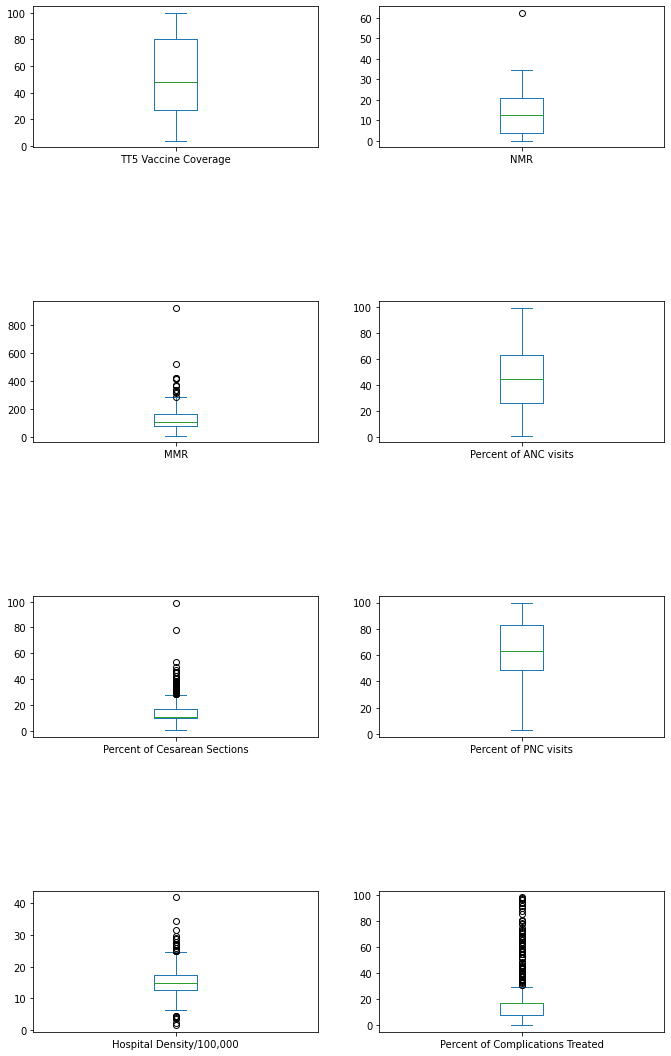

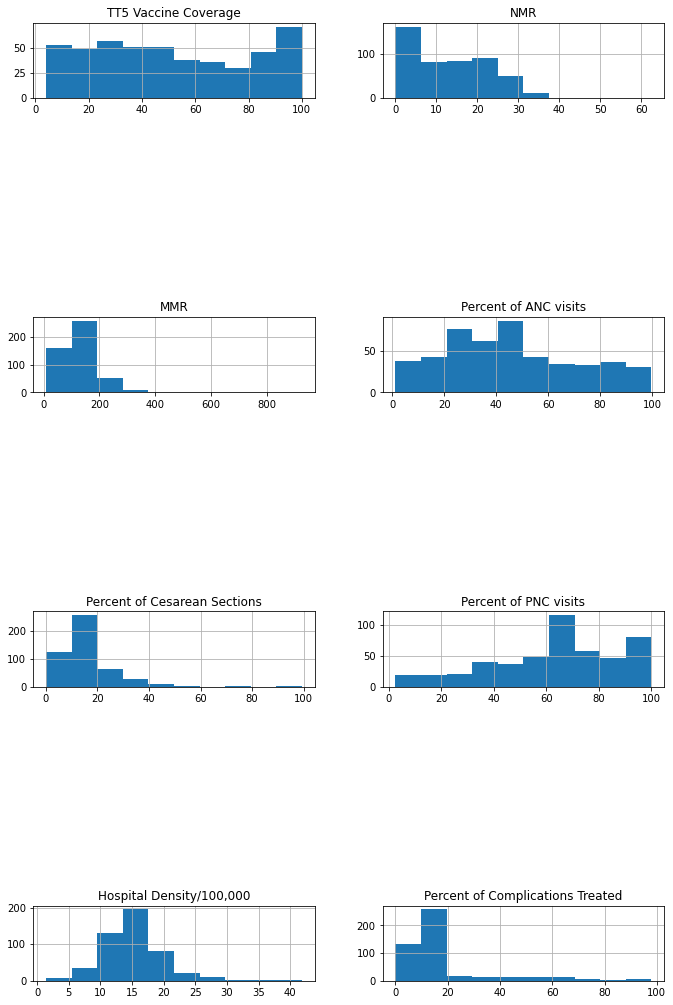

In [588]:
#Now visualise the data to see what else we can learn from it.
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#Boxplots
df2.plot(kind='box', subplots=True, layout=(5,2), sharex=False, sharey=False)
plt.tight_layout()
plt.gcf().set_size_inches(10,20)
plt.show()


#Histograms
df2.hist(layout = (5,2))
plt.tight_layout()
plt.gcf().set_size_inches(10,20)
plt.show()

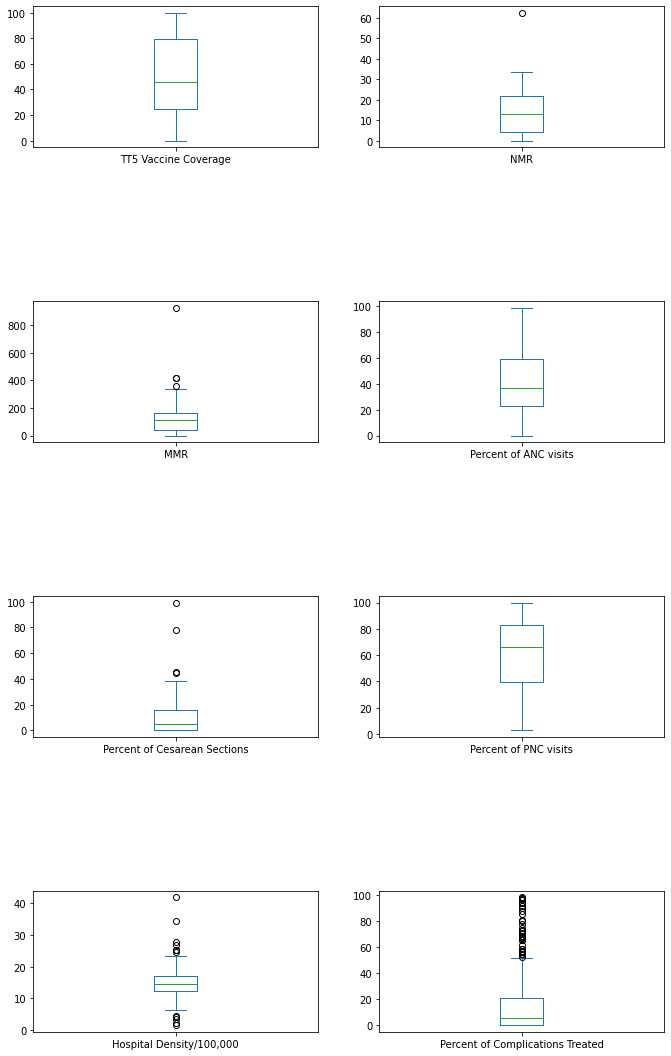

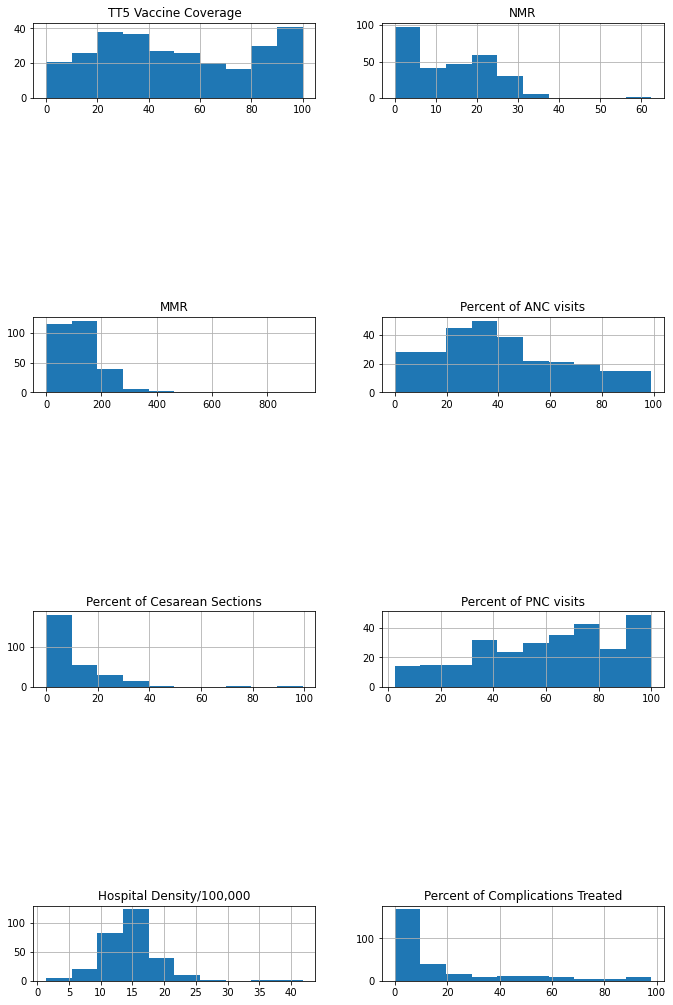

In [589]:
#Boxplots
df3.plot(kind='box', subplots=True, layout=(5,2), sharex=False, sharey=False)
plt.tight_layout()
plt.gcf().set_size_inches(10,20)
plt.show()

#Histograms
df3.hist(layout = (5,2))
plt.tight_layout()
plt.gcf().set_size_inches(10,20)
plt.show()

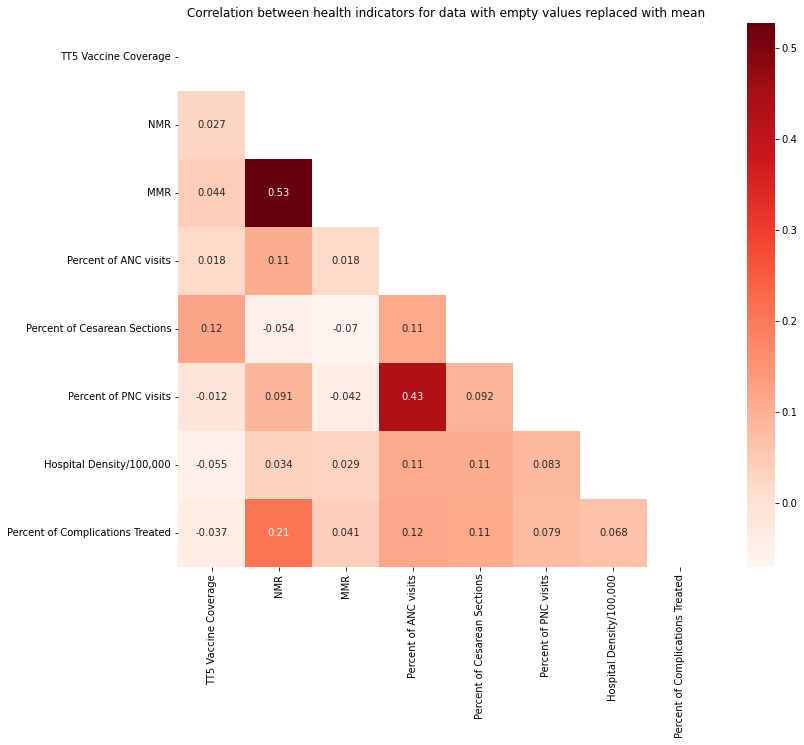

In [543]:
##Visualise heat map to see if there is any correlation between measures
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df2.corr()
matrix = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, mask = matrix)
plt.title('Correlation between health indicators for data with empty values replaced with mean')
plt.show()

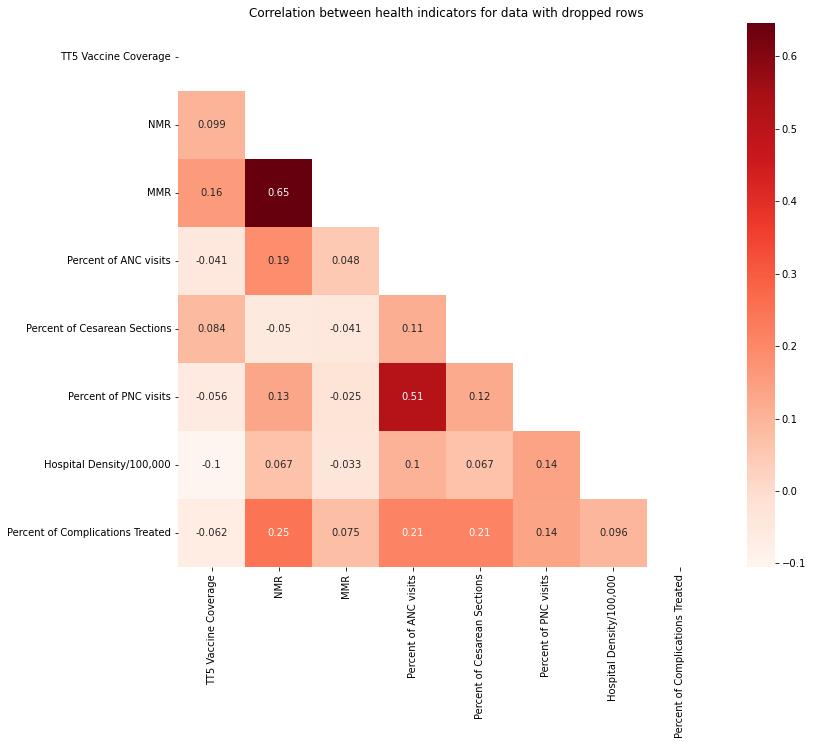

In [542]:
##Visualise heat map to see if there is any correlation between measures
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df3.corr()
matrix = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, mask = matrix)
plt.title('Correlation between health indicators for data with dropped rows')
plt.show()

Now let's reduce the dimensions of the data to just 2D and see what else we can learn. 

In [481]:
#First import required libraries for a principal component analysis
from sklearn.preprocessing import StandardScaler #For normalising data
from sklearn.decomposition import PCA 

In [482]:
#Make a copy of the dataframe to avoid overwriting it
df4 = df3.copy()

#Reset index to replace locations with numbers as locations are no longer needed
df4 = df4.reset_index(drop=True)

#Inspect dataframe
df4

,TT5 Vaccine Coverage,NMR,MMR,Percent of ANC visits,Percent of Cesarean Sections,Percent of PNC visits,"Hospital Density/100,000",Percent of Complications Treated
0,82.0,17.9,214,60.85,4.32,35.77,19.718310,11.08
1,29.0,12.2,180,24.59,34.41,46.35,19.580420,44.51
2,40.0,22.4,417,50.21,10.64,63.61,8.387097,23.96
3,63.0,23.4,361,30.62,7.22,67.90,22.121212,0.00
4,66.0,11.9,334,29.79,26.73,24.96,16.250000,15.81
...,...,...,...,...,...,...,...,...
278,7.0,5.9,100,37.94,12.70,73.49,17.730496,21.52
279,9.0,22.5,156,31.69,9.75,30.82,12.350598,10.18
280,32.0,29.2,150,42.83,2.43,97.17,14.765101,12.62
281,10.0,19.0,177,49.08,11.73,49.24,14.671815,26.53


In [485]:
#Locate MMR values 
mmr_mag = df4.values[:,2]

#Replace MMR values <70 with 0
mmr_mag = np.where(mmr_mag <= 70, 0, mmr_mag)
#Replace MMR values >70 and <100 with 1
mmr_mag = np.where(((mmr_mag > 70) & (mmr_mag <= 100)), 1, mmr_mag)
#Replace MMR values >100 and <150 with 2
mmr_mag = np.where(((mmr_mag > 100) & (mmr_mag <= 150)), 2, mmr_mag)
#Replace MMR values >150 and <200 with 3
mmr_mag = np.where(((mmr_mag > 150) & (mmr_mag <= 200)), 3, mmr_mag)
#Replace MMR values >200 with 4
mmr_mag = np.where(mmr_mag >= 200, 4, mmr_mag)


#Now add this to existing dataframe
mmr_score_df = pd.DataFrame(mmr_mag)

df4 = df4.join(mmr_score_df)

In [486]:
#Now amend df2 so that it only contains NMR score 0-4
df4 = df4.drop(['MMR'],axis = 1)
df4['MMR_score'] = df4[[0]]
df4 = df4.drop([0], axis = 1)

In [487]:
#Replace values of 0-4 with ranges
df4['MMR_score'] = df4['MMR_score'].replace(0,'<70 MMR')
df4['MMR_score'] = df4['MMR_score'].replace(1,'70-100 MMR')
df4['MMR_score'] = df4['MMR_score'].replace(2,'100-150 MMR')
df4['MMR_score'] = df4['MMR_score'].replace(3,'150-200 MMR')
df4['MMR_score'] = df4['MMR_score'].replace(4,'>200 MMR')

#Inspect dataframe
df4

,TT5 Vaccine Coverage,NMR,Percent of ANC visits,Percent of Cesarean Sections,Percent of PNC visits,"Hospital Density/100,000",Percent of Complications Treated,MMR_score
0,82.0,17.9,60.85,4.32,35.77,19.718310,11.08,>200 MMR
1,29.0,12.2,24.59,34.41,46.35,19.580420,44.51,150-200 MMR
2,40.0,22.4,50.21,10.64,63.61,8.387097,23.96,>200 MMR
3,63.0,23.4,30.62,7.22,67.90,22.121212,0.00,>200 MMR
4,66.0,11.9,29.79,26.73,24.96,16.250000,15.81,>200 MMR
...,...,...,...,...,...,...,...,...
278,7.0,5.9,37.94,12.70,73.49,17.730496,21.52,70-100 MMR
279,9.0,22.5,31.69,9.75,30.82,12.350598,10.18,150-200 MMR
280,32.0,29.2,42.83,2.43,97.17,14.765101,12.62,100-150 MMR
281,10.0,19.0,49.08,11.73,49.24,14.671815,26.53,150-200 MMR


### Dimensionality Reduction with Principal Component Analysis 

In [488]:
#Dataframe is now ready for PCA

features = ['TT5 Vaccine Coverage', 'NMR','Percent of ANC visits', 'Percent of Cesarean Sections', 'Percent of PNC visits', 'Hospital Density/100,000', 'Percent of Complications Treated']

# Separating out the features
x = df3.loc[:, features].values

# Separating out the target
y = df3.loc[:,['MMR_score']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [489]:
##Check data has been normalised. Should have mean as close to 0 and sd as close to 1, as possible
print(x.shape)

np.mean(x),np.std(x)

(283, 7)


(4.483485207976402e-17, 1.0)

In [490]:
pca = PCA(n_components = 7)
principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principalComponents, columns = ['pc_1', 'pc_2', 'pc_3','pc_4','pc_5','pc_6','pc_7'])

In [492]:
final_df = pd.concat([principal_df, df4[['MMR_score']]], axis = 1)
final_df

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,MMR_score
0,0.097815,-0.495064,-0.493970,0.371448,1.435461,0.423833,1.235377,>200 MMR
1,0.579131,0.100441,2.113145,1.698022,0.068658,-0.508916,-0.059079,150-200 MMR
2,0.324821,-0.639347,-0.590325,-0.187426,-1.379276,-0.618750,0.061223,>200 MMR
3,0.286137,0.124369,-0.541200,0.639915,1.904974,-0.576980,-0.333889,>200 MMR
4,-0.645106,-0.825699,1.400125,0.703325,0.494032,-0.438282,0.682954,>200 MMR
...,...,...,...,...,...,...,...,...
278,0.334209,1.622951,0.728955,0.375115,-0.228886,-0.093873,-0.337774,70-100 MMR
279,-0.693143,0.342219,-0.435030,1.018977,-0.947989,-1.264653,0.528875,150-200 MMR
280,1.077169,0.299379,-1.437372,0.040710,-0.061354,-0.923977,-0.904032,100-150 MMR
281,0.398710,0.640249,-0.094822,0.879915,-0.820988,-0.632892,0.504282,150-200 MMR


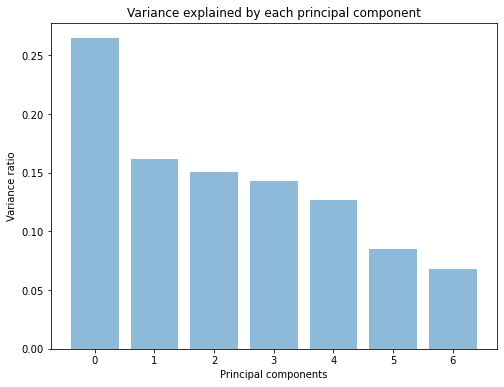

In [510]:
##Add in bar graph of variance for all different components
var_expl = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(7), var_expl, alpha=0.5, align='center')
plt.title('Variance explained by each principal component')
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

In [524]:
##Function to plot PCA

def pca_plot(pc1_label, pc2_label, pc1_no, pc2_no):
    
    fig = plt.figure(figsize = (8,8))

    targets = ['<70 MMR', '70-100 MMR','100-150 MMR','150-200 MMR','>200 MMR']
    colors = ['r', 'b', 'g','c']
    for target, color in zip(targets,colors):
        indicesToKeep = final_df['MMR_score'] == target
        plt.scatter(final_df.loc[indicesToKeep, 'pc_1']
               , final_df.loc[indicesToKeep, 'pc_2']
               , c = color
               , s = 10)

    plt.title("PCA of Maternal Mortality Rate in Bangladesh")
    plt.legend(targets,loc=2, shadow=False)    
    plt.xlabel(pc1_label + ' : ' + str(round(var_expl[pc1_no]*100,1)) + '% variance explained')
    plt.ylabel(pc2_label + ' : ' + str(round(var_expl[pc2_no]*100,1)) + '% variance explained'
          )    
    plt.show()
    
    return(plt.show())

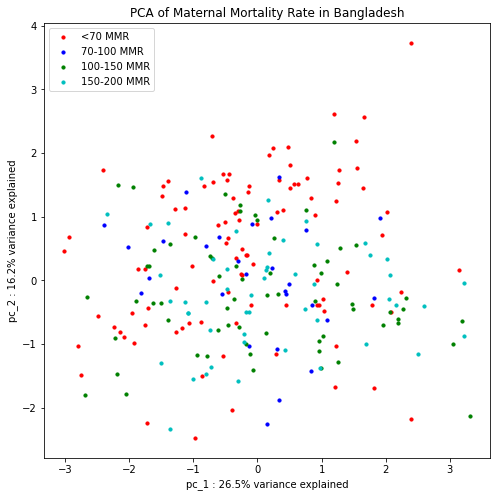

In [525]:
#PCA for first two components
pca_plot('pc_1','pc_2',0,1)

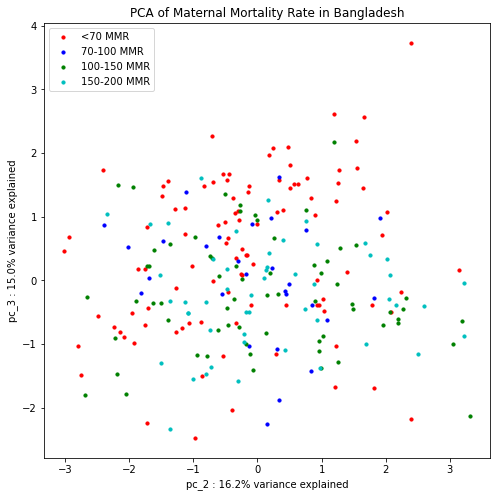

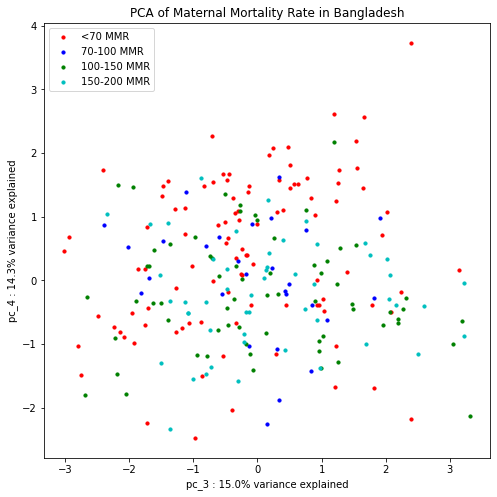

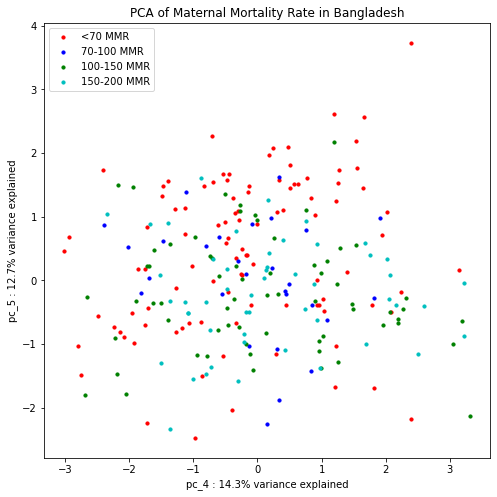

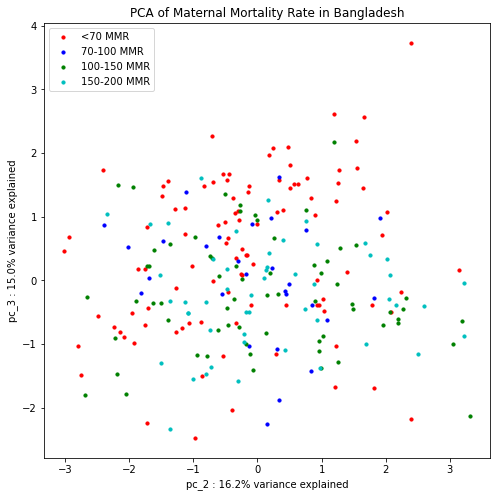

In [590]:
#PCA for other components
pca_plot('pc_2','pc_3',1,2)
pca_plot('pc_3','pc_4',2,3)
pca_plot('pc_4','pc_5',3,4)
pca_plot('pc_5','pc_6',4,5)
pca_plot('pc_6','pc_7',5,6)

## Now to see how this compares with global data

In [78]:
#Function for reading csv into dataframe

def get_csv(x):
    y = pd.read_csv(x,index_col = 0)
    return(y)

In [79]:
#Load in Neonatal Mortality Rate global data
nmr_df = get_csv(r"C:\Users\wtaylor\Downloads\NMR_global.csv")

#Load in Caesarian Section global data
csec_df = get_csv(r"C:\Users\wtaylor\Downloads\caesarean_section_global.csv")
               
#Load in Antenatal Care (4 visits+) data
anc_df = get_csv(r"C:\Users\wtaylor\Downloads\ANC_4_global.csv")

#Load in Hospital Denisty data
hosp_df = get_csv(r"C:\Users\wtaylor\Downloads\hospital_density_global.csv")

#Load in Tetanus Vaccine global data. Note use xlsl but changed to csv to make it easier for data management 
tvac_df = pd.read_excel(r"C:\Users\wtaylor\Downloads\Protection at birth (PAB) against neonatal tetanus and Tetanus toxoid-containing vaccine (TT2+_Td2+) vaccination coverage.xlsx")

#tvac_df = xl_tvac_df.to_csv(r'C:\Users\wtaylor\Downloads\tetanus_immunisation_global.csv', index = None, header=True)

In [80]:
#First need to ensure data only contains NMR values for both sexes
nmr_df = nmr_df.loc[(nmr_df['Indicator'] == 'Neonatal mortality rate (per 1000 live births)') & (nmr_df['Dim1'] == 'Both sexes')]

#Obtain NMR values and their respective country
nmr = nmr_df[['Location', 'Period','FactValueNumeric']]

#We only want data from 2000-2019
nmr = nmr.loc[(nmr['Period'] >= 2000) & (nmr['Period'] <= 2019)]

#Change names of columns to make them more understandable for reader
nmr = nmr.rename({'Period': 'Year', 'FactValueNumeric': 'NMR'}, axis=1)

In [81]:
#Obtain caesarian section values and their respective country
csec = csec_df[['Location', 'Period','FactValueNumeric']]

#Change names of columns to make them more understandable for reader
csec = csec.rename({'Period': 'Year', 'FactValueNumeric': 'Percentage of C-sections'}, axis=1)

#Now get average C-section for each region
csec = csec.groupby('Location').mean().reset_index()

In [82]:
#Obtain caesarian section values and their respective country
anc = anc_df[['Location', 'Period','FactValueNumeric']]

#Change names of columns to make them more understandable for reader
anc = anc.rename({'Period': 'Year', 'FactValueNumeric': 'Percentage of >4 ANC visits'}, axis=1)

##Now get average of ANC for each region
anc = anc.groupby('Location').mean().reset_index()

In [83]:
#First need to ensure Official Coverage is recorded
tvac_df = tvac_df.loc[tvac_df['COVERAGE_CATEGORY'] == 'OFFICIAL']

#Obtain vaccination coverages and their respective country
tvac = tvac_df[['NAME', 'YEAR','COVERAGE']]

#Change names of columns to make them more understandable for reader
tvac = tvac.rename({'NAME': 'Location','YEAR': 'Year', 'COVERAGE': 'Vaccination Coverage'}, axis=1)

#Ensure only data from 2000-2019 is present
tvac = tvac.loc[(tvac['Year'] >= 2000) & (tvac['Year'] <= 2019)]


#Now do sense check of data. Importantly, max vaccination coverage goes above 100 so will need to clean this up. 
for value in tvac['Vaccination Coverage']:
    if value > 100.0:
        tvac['Vaccination Coverage']=tvac['Vaccination Coverage'].replace(value, np.nan)

#Now drop rows which contain empty values
tvac = tvac[tvac['Vaccination Coverage'].notna()]   

In [84]:
#Obtain hospital denisty for each region
hosp_no = hosp_df[['Location','Value']]

#Change names of columns to make them more understandable for reader
hosp_no = hosp_no.rename({'Value': 'Hospital Density/100,000'}, axis=1)

#Get average of hospital density for each regiion
hosp_no = hosp_no.groupby('Location').mean().reset_index()

In [85]:
##Now merge datasets into one

new_df = pd.merge(tvac, nmr, left_on=['Location', 'Year'], right_on = ['Location', 'Year'],how='left')

##Merge on C-section data
new_df2 = pd.merge(new_df,csec[['Percentage of C-sections','Location']],on='Location', how='left')

#Now merge on ANC
new_df3 = pd.merge(new_df2,anc[['Percentage of >4 ANC visits','Location']],on='Location', how='left')

#Now merge on hospital density
new_df4 = pd.merge(new_df3,hosp_no[['Hospital Density/100,000','Location']],on = 'Location', how = 'left')

In [86]:
###Fill empty values with means

new_df4['Percentage of C-sections'] = new_df4['Percentage of C-sections'].fillna(new_df4.groupby('Location')['Percentage of C-sections'].transform('mean'))
new_df4['Percentage of >4 ANC visits'] = new_df4['Percentage of >4 ANC visits'].fillna(new_df4.groupby('Location')['Percentage of >4 ANC visits'].transform('mean'))
new_df4['NMR'] = new_df4['NMR'].fillna(new_df4.groupby('Location')['NMR'].transform('mean'))
new_df4['Hospital Density/100,000'] = new_df4['Hospital Density/100,000'].fillna(new_df4.groupby('Location')['Hospital Density/100,000'].transform('mean'))

In [87]:
##Now drop rows which still have remaining empty values. This may happen because not all databases had the same number of countries and therefore some columns will have missing data still
new_df4.dropna(subset=['NMR','Percentage of C-sections','Percentage of >4 ANC visits','Hospital Density/100,000'], inplace=True)

Now we have a similiar dataset to the one we had webscraped except for the fact that this has far more values. Let's now check the data

In [120]:
new_df4.loc[new_df4['Location'] == 'Bangladesh']

,Location,Year,Vaccination Coverage,NMR,Percentage of C-sections,Percentage of >4 ANC visits,"Hospital Density/100,000"
106,Bangladesh,2019,94.0,19.06,30.7,22.776923,0.17
107,Bangladesh,2018,97.0,19.83,30.7,22.776923,0.17
108,Bangladesh,2017,97.0,20.66,30.7,22.776923,0.17
109,Bangladesh,2016,96.3,21.56,30.7,22.776923,0.17
110,Bangladesh,2015,98.0,22.51,30.7,22.776923,0.17
111,Bangladesh,2014,97.5,23.52,30.7,22.776923,0.17
112,Bangladesh,2013,96.3,24.61,30.7,22.776923,0.17
113,Bangladesh,2012,96.0,25.76,30.7,22.776923,0.17
114,Bangladesh,2011,96.0,26.99,30.7,22.776923,0.17
115,Bangladesh,2010,95.0,28.28,30.7,22.776923,0.17


In [88]:
new_df4.describe()

,Year,Vaccination Coverage,NMR,Percentage of C-sections,Percentage of >4 ANC visits,"Hospital Density/100,000"
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,2009.725474,66.080495,23.862968,15.007131,61.245257,2.208545
std,5.733463,24.078557,11.935757,13.508374,21.647323,7.024349
min,2000.000000,0.000000,1.350000,1.400000,16.900000,0.000000
25%,2005.000000,50.000000,13.210000,4.500000,45.583333,0.410000
50%,2010.000000,69.000000,24.110000,9.300000,64.016667,0.700000
75%,2015.000000,86.000000,32.420000,26.700000,77.077778,1.810000
max,2019.000000,100.000000,60.630000,51.800000,99.800000,56.450000


In [91]:
#Make a copy of the dataframe to avoid overwriting it
new_df5 = new_df4.copy()

#Reset index to replace locations with numbers as locations are no longer needed
new_df5 = new_df5.reset_index(drop=True)


In [92]:
#Locate NMR values 
nmr_mag = new_df5.values[:,2]

#Replace NMR values <5 with 0
nmr_mag = np.where(nmr_mag <= 5, 0, nmr_mag)
#Replace NMR values >5 and <10 with 1
nmr_mag = np.where(((nmr_mag > 5) & (nmr_mag <= 10)), 1, nmr_mag)
#Replace NMR values >10 and <15 with 2
nmr_mag = np.where(((nmr_mag > 10) & (nmr_mag <= 15)), 2, nmr_mag)
#Replace NMR values >15 and <20 with 3
nmr_mag = np.where(((nmr_mag > 15) & (nmr_mag <= 20)), 3, nmr_mag)
#Replace NMR values >20 with 4
nmr_mag = np.where(nmr_mag >= 20, 4, nmr_mag)

#Now add this to existing dataframe
nmr_score_df = pd.DataFrame(nmr_mag)

new_df5 = new_df5.join(nmr_score_df)

In [93]:
#Now amend new_df5 so that it only contains NMR score 0-4
new_df5 = new_df5.drop(['NMR'],axis = 1)
new_df5['NMR_score'] = new_df5[[0]]
new_df5 = new_df5.drop([0], axis = 1)

In [94]:
#Replace values of 0-4 with ranges
new_df5['NMR_score'] = new_df5['NMR_score'].replace(0,'<5 NMR')
new_df5['NMR_score'] = new_df5['NMR_score'].replace(1,'5-10 NMR')
new_df5['NMR_score'] = new_df5['NMR_score'].replace(2,'10-15 NMR')
new_df5['NMR_score'] = new_df5['NMR_score'].replace(3,'15-20 NMR')
new_df5['NMR_score'] = new_df5['NMR_score'].replace(4,'>20 NMR')

#Inspect dataframe
new_df5

,Location,Year,Vaccination Coverage,Percentage of C-sections,Percentage of >4 ANC visits,"Hospital Density/100,000",NMR_score
0,Afghanistan,2019,85.0,2.7,16.9000,0.37,>20 NMR
1,Afghanistan,2018,85.0,2.7,16.9000,0.37,>20 NMR
2,Afghanistan,2017,86.0,2.7,16.9000,0.37,>20 NMR
3,Afghanistan,2016,58.0,2.7,16.9000,0.37,>20 NMR
4,Afghanistan,2015,91.0,2.7,16.9000,0.37,>20 NMR
...,...,...,...,...,...,...,...
1208,Zimbabwe,2004,70.0,5.8,68.5375,0.52,>20 NMR
1209,Zimbabwe,2003,60.0,5.8,68.5375,0.52,>20 NMR
1210,Zimbabwe,2002,60.0,5.8,68.5375,0.52,>20 NMR
1211,Zimbabwe,2001,60.0,5.8,68.5375,0.52,>20 NMR


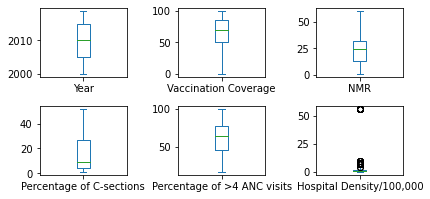

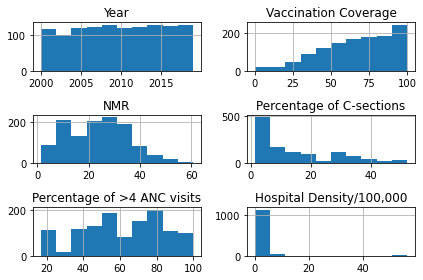

In [98]:
#Boxplots
new_df4.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

#Histograms
new_df4.hist()
plt.tight_layout()
plt.show()

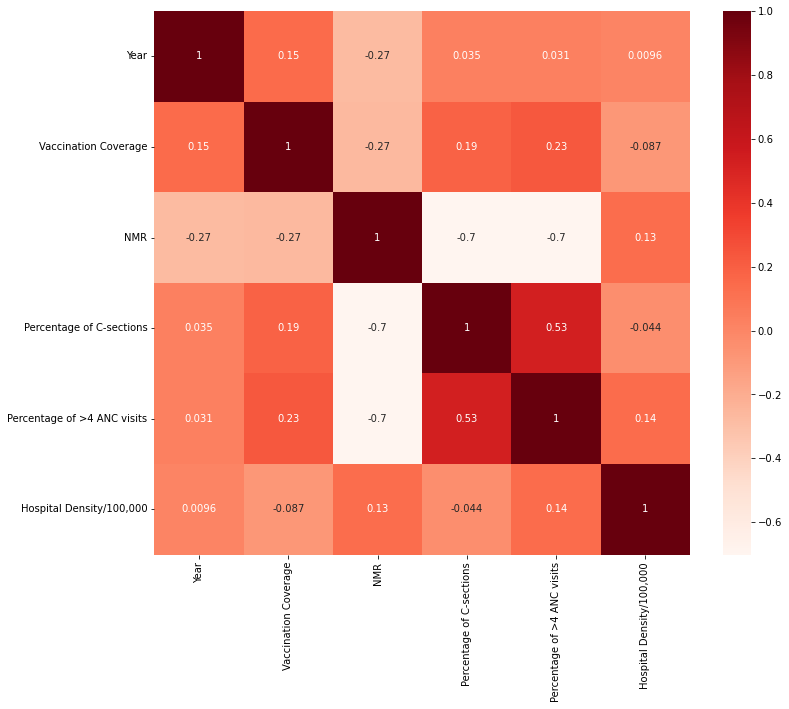

In [97]:
plt.figure(figsize=(12,10))
cor = new_df4.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Now let's conduct a PCA to see how it differs from that of just the Bangladesh data

In [103]:
features = ['Vaccination Coverage', 'Percentage of C-sections','Percentage of >4 ANC visits',  'Hospital Density/100,000']

# Separating out the features
x = new_df5.loc[:, features].values

# Separating out the target
y = new_df5.loc[:,['NMR_score']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [104]:
##Check data has been normalised. Should have mean as close to 0 and sd as close to 1, as possible
print(x.shape)

np.mean(x),np.std(x)

(1213, 4)


(-1.6474867636647004e-16, 1.0)

In [105]:
pca = PCA()
principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principalComponents, columns = ['pc_1', 'pc_2', 'pc_3','pc_4'])

In [110]:
final_df = pd.concat([principal_df, new_df5[['NMR_score']]], axis = 1)
final_df

,pc_1,pc_2,pc_3,pc_4,NMR_score
0,1.623559,-0.976726,1.148996,0.898345,>20 NMR
1,1.623559,-0.976726,1.148996,0.898345,>20 NMR
2,1.606884,-0.993915,1.182604,0.903161,>20 NMR
3,2.073776,-0.512609,0.241578,0.768304,>20 NMR
4,1.523511,-1.079863,1.350645,0.927243,>20 NMR
...,...,...,...,...,...
1208,0.156879,-0.194324,0.283138,-0.721338,>20 NMR
1209,0.323626,-0.022429,-0.052943,-0.769501,>20 NMR
1210,0.323626,-0.022429,-0.052943,-0.769501,>20 NMR
1211,0.323626,-0.022429,-0.052943,-0.769501,>20 NMR


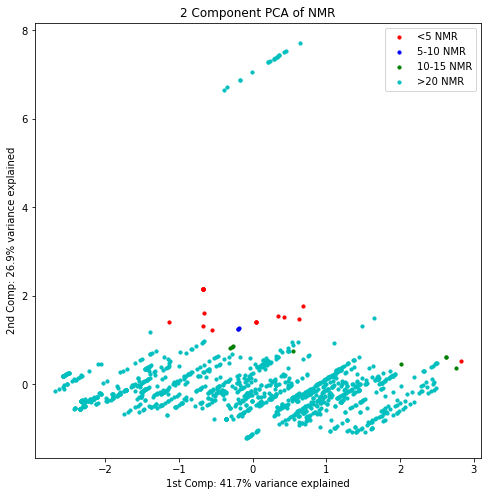

In [112]:
##First PCA for first two components
fig = plt.figure(figsize = (8,8))

var_expl = pca.explained_variance_ratio_

targets = ['<5 NMR', '5-10 NMR','10-15 NMR','>20 NMR']
colors = ['r', 'b', 'g','c']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['NMR_score'] == target
    plt.scatter(final_df.loc[indicesToKeep, 'pc_1']
               , final_df.loc[indicesToKeep, 'pc_2']
               , c = color
               , s = 10)

plt.title("2 Component PCA of NMR")
plt.legend(targets,loc=1, shadow=False)    
plt.xlabel('1st Comp: ' + str(round(var_expl[0]*100,1)) + '% variance explained')
plt.ylabel('2nd Comp: ' + str(round(var_expl[1]*100,1)) + '% variance explained')    
plt.show()

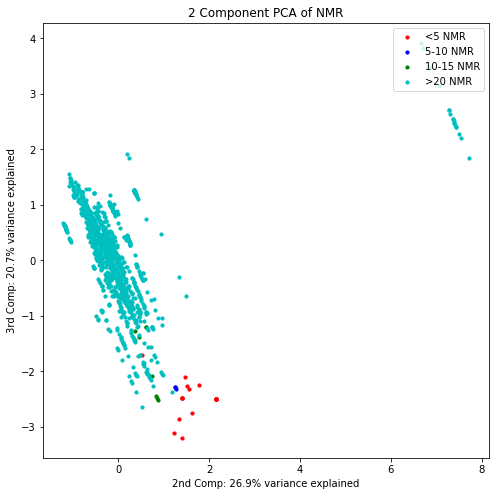

In [113]:
##PCA of components 2 and 3
fig = plt.figure(figsize = (8,8))

var_expl = pca.explained_variance_ratio_

targets = ['<5 NMR', '5-10 NMR','10-15 NMR','>20 NMR']
colors = ['r', 'b', 'g','c']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['NMR_score'] == target
    plt.scatter(final_df.loc[indicesToKeep, 'pc_2']
               , final_df.loc[indicesToKeep, 'pc_3']
               , c = color
               , s = 10)

plt.title("2 Component PCA of NMR")
plt.legend(targets,loc=1, shadow=False)    
plt.xlabel('2nd Comp: ' + str(round(var_expl[1]*100,1)) + '% variance explained')
plt.ylabel('3rd Comp: ' + str(round(var_expl[2]*100,1)) + '% variance explained')    
plt.show()

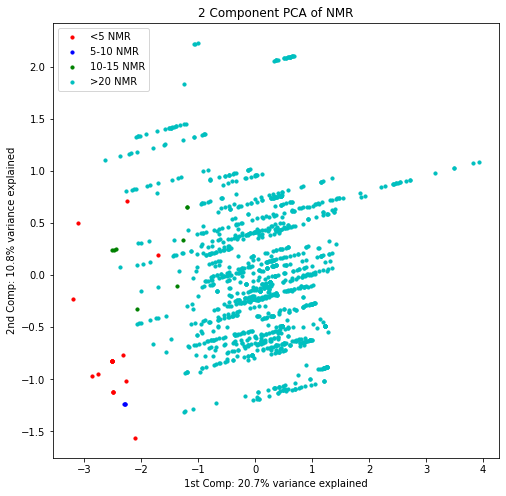

In [114]:
##PCA of components 3 and 4
fig = plt.figure(figsize = (8,8))

var_expl = pca.explained_variance_ratio_

targets = ['<5 NMR', '5-10 NMR','10-15 NMR','>20 NMR']
colors = ['r', 'b', 'g','c']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['NMR_score'] == target
    plt.scatter(final_df.loc[indicesToKeep, 'pc_3']
               , final_df.loc[indicesToKeep, 'pc_4']
               , c = color
               , s = 10)

plt.title("2 Component PCA of NMR")
plt.legend(targets,loc=2, shadow=False)    
plt.xlabel('1st Comp: ' + str(round(var_expl[2]*100,1)) + '% variance explained')
plt.ylabel('2nd Comp: ' + str(round(var_expl[3]*100,1)) + '% variance explained')    
plt.show()